**Set environment**

In [1]:
suppressMessages(source("../config_sing.R"))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc 


## ATAC-STARR

In [2]:
###
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "fragment")
fname = "library_size.tsv"
fpath = file.path(fdiry, fname)

dat_lib = read_tsv(fpath, show_col_types = FALSE)
dat_lib = dat_lib %>% dplyr::filter(Dedup | Group=="Output")
dat_lib

Sample,Group,Replicate,Region,Dedup,Size
<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>
Input_rep1,Input,rep1,GATA1,TRUE,358823
Input_rep1,Input,rep1,MYC,TRUE,255600
Input_rep2,Input,rep2,GATA1,TRUE,461577
Input_rep2,Input,rep2,MYC,TRUE,331419
Input_rep3,Input,rep3,GATA1,TRUE,496229
Input_rep3,Input,rep3,MYC,TRUE,359228
Input_rep4,Input,rep4,GATA1,TRUE,464845
Input_rep4,Input,rep4,MYC,TRUE,335999
Input_rep5,Input,rep5,GATA1,TRUE,454013


In [3]:
### init: file directory
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")

### init:
ctypes = c(col_character(), col_integer(), col_integer())
cnames = c("Chrom", "Loc", "Depth")

### INPUT: set sample group and number of replicates
REGION = "GATA1"
GROUP  = "Input"
REPLS  = paste0("rep", 1:6)
DEDUP  = "dedups"

### INPUT: import data
cat("Input (Deduplicated)", "\n")
lst_dat_inp = lapply(REPLS, function(repl){
    ### get sample file path
    sam   = paste(GROUP, repl, sep="_")
    fglob = paste0("*", sam, "*", REGION, "*", DEDUP, "*", "perbase.tsv.gz")
    fpath = Sys.glob(file.path(fdiry, fglob))
    
    ### read data
    print(fpath)
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = sam
    dat$Region = REGION
    return(dat)
})

### OUTPUT: set sample group and number of replicates
REGION = "GATA1"
GROUP   = "Output"
REPLS = paste0("rep", 1:4)

### OUTPUT: import data
cat("\n", "Output", "\n")
lst_dat_out = lapply(REPLS, function(repl){
    ### get sample file path
    sam   = paste(GROUP, repl, sep="_")
    fglob = paste0("*", sam, "*", "perbase.tsv.gz")
    fpath = Sys.glob(file.path(fdiry, fglob))
    
    ### read data
    print(fpath)
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = sam
    dat$Region = REGION
    return(dat)
})

Input (Deduplicated) 
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep1.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep2.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep3.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep4.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep5.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep6.GATA1.unstranded.dedups.perbase.tsv.gz"

 Output 
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS

In [6]:
### summarize
dat = bind_rows(lst_dat_inp, lst_dat_out) %>% 
    left_join(dat_lib, by=c("Sample", "Region")) %>%
    mutate(Depth_Norm = Depth / Size)
print(head(dat))

# A tibble: 6 × 10
  Chrom      Loc Depth Sample     Region Group Replicate Dedup   Size Depth_Norm
  <chr>    <dbl> <dbl> <chr>      <chr>  <chr> <chr>     <lgl>  <dbl>      <dbl>
1 chrX  47786400     0 Input_rep1 GATA1  Input rep1      TRUE  358823          0
2 chrX  47786401     0 Input_rep1 GATA1  Input rep1      TRUE  358823          0
3 chrX  47786402     0 Input_rep1 GATA1  Input rep1      TRUE  358823          0
4 chrX  47786403     0 Input_rep1 GATA1  Input rep1      TRUE  358823          0
5 chrX  47786404     0 Input_rep1 GATA1  Input rep1      TRUE  358823          0
6 chrX  47786405     0 Input_rep1 GATA1  Input rep1      TRUE  358823          0


In [8]:
dat = dat %>% 
    dplyr::select(Chrom, Loc, Group, Depth_Norm) %>%
    group_by(Loc, Group) %>% 
    summarize(Value = mean(Depth_Norm), .groups='drop')
head(dat)

Loc,Group,Value
<dbl>,<chr>,<dbl>
47786400,Input,0
47786400,Output,0
47786401,Input,0
47786401,Output,0
47786402,Input,0
47786402,Output,0


In [9]:
dat = dat %>% 
    spread(Group, Value) %>%
    mutate(FC = Output / (Input+1))
head(dat)

Loc,Input,Output,FC
<dbl>,<dbl>,<dbl>,<dbl>
47786400,0,0,0
47786401,0,0,0
47786402,0,0,0
47786403,0,0,0
47786404,0,0,0
47786405,0,0,0


In [10]:
dat_astarr = dat

In [ ]:
 %>% 
    spread(Group, Value) %>%
    mutate(FC = Output / (Input+1))

In [6]:
### summarize
dat = bind_rows(lst_dat_inp, lst_dat_out) %>% 
    left_join(dat_lib, by=c("Sample", "Region")) %>%
    mutate(Depth_Norm = Depth / Size)
print(head(dat))

dat = dat %>% 
    group_by(Loc, Group) %>% 
    summarize(Value = mean(Depth_Norm), .groups='drop') %>% 
    spread(Group, Value) %>%
    mutate(FC = Output / (Input+1))

### assign
dat_astarr = dat
print(dim(dat_astarr))
head(dat_astarr)

# A tibble: 6 × 11
  Chrom      Loc Depth Sample     Region.x Group Replicate Region.y Dedup   Size
  <chr>    <dbl> <dbl> <chr>      <chr>    <chr> <chr>     <chr>    <lgl>  <dbl>
1 chrX  47786400     0 Input_rep1 GATA1    Input rep1      GATA1    TRUE  358823
2 chrX  47786400     0 Input_rep1 GATA1    Input rep1      MYC      TRUE  255600
3 chrX  47786401     0 Input_rep1 GATA1    Input rep1      GATA1    TRUE  358823
4 chrX  47786401     0 Input_rep1 GATA1    Input rep1      MYC      TRUE  255600
5 chrX  47786402     0 Input_rep1 GATA1    Input rep1      GATA1    TRUE  358823
6 chrX  47786402     0 Input_rep1 GATA1    Input rep1      MYC      TRUE  255600
# … with 1 more variable: Depth_Norm <dbl>


## Tiling MPRA

In [11]:
### init: set file directory and path
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "count")
fname = "Tile_K562_20210130.GATA1.unstranded.bed"
fpath = file.path(fdiry, fname)

### init: set column names
cnames = c("Chrom", "Start", "End", "ID", "Score", "Strand", 
           "log2fc", "Input_Count", "Output_Count", 
           "log10pval", "log10fdr", "lfc-se")

### import data
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat = dat %>% mutate(Loc = (Start + End) / 2)

### assign
dat_tmpra = dat
print(dim(dat_tmpra))
head(dat_tmpra)

[1] 52312    13


Chrom,Start,End,ID,Score,Strand,log2fc,Input_Count,Output_Count,log10pval,log10fdr,lfc-se,Loc
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47786401,47786600,X:47786401-47786600,.,+,2.30593934,2117.787,10474.869,112.1126526,110.93113079,0.10214790,47786500
chrX,47786451,47786650,X:47786451-47786650,.,+,0.78305606,1386.007,2387.119,11.3173884,10.64251685,0.11330705,47786550
chrX,47786501,47786700,X:47786501-47786700,.,+,-0.12873196,1955.626,1788.236,0.8450697,0.62872262,0.08785968,47786600
chrX,47786551,47786750,X:47786551-47786750,.,+,0.58829515,2388.997,3591.264,11.2404554,10.56667887,0.08543661,47786650
chrX,47786601,47786800,X:47786601-47786800,.,+,0.06670014,2102.916,2202.385,0.3095900,0.21047015,0.09667741,47786700
chrX,47786651,47786850,X:47786651-47786850,.,+,-0.02967703,1571.259,1537.475,0.1009399,0.06453099,0.11287406,47786750


## Summarize Ratio

In [12]:
print(range(dat_astarr$Loc))
print(range(dat_tmpra$Start))
print(range(dat_tmpra$End))

[1]  47786400 128736249
[1] 47786401 49786551
[1] 47786600 49786750


In [19]:
### set bins
start  = 47786400
end    = 49786750
size   = 100
breaks = seq(start, end, size)

### binning the data
df1 = dat_astarr
df1$group = cut(df1$Loc, breaks=breaks, right = FALSE, dig.lab = 10)

df2 = dat_tmpra 
df2$group = cut(df2$Loc, breaks=breaks, right = FALSE, dig.lab = 10)

### summarize the ratio
df1 = df1 %>% 
    group_by(group) %>% 
    summarize(
        Input  = mean(Input),
        Output = mean(Output),
        FC_mu  = mean(FC))

In [30]:
dat = dat_astarr
range(dat$Loc)

[1]  47786400 128736249

In [28]:
df1 %>% dplyr::filter(is.na(FC_mu)) 

group,Input,Output,FC_mu,FC_zs
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
NA,NA,9.040279e-05,NA,NA


In [25]:
df1$FC_zs  = (df1$FC_mu - mean(df1$FC_mu)) / sd(df1$FC_mu)
head(df1)

group,Input,Output,FC_mu,FC_zs
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
"[47786400,47786500)",0.000000e+00,0,0,NA
"[47786500,47786600)",3.321945e-07,0,0,NA
"[47786600,47786700)",3.610810e-07,0,0,NA
"[47786700,47786800)",5.127350e-07,0,0,NA
"[47786800,47786900)",7.221619e-07,0,0,NA
"[47786900,47787000)",6.453957e-07,0,0,NA


In [13]:
### set bins
start  = 47786400
end    = 49786750
size   = 100
breaks = seq(start, end, size)

### binning the data
df1 = dat_astarr
df1$group = cut(df1$Loc, breaks=breaks, right = FALSE, dig.lab = 10)

df2 = dat_tmpra 
df2$group = cut(df2$Loc, breaks=breaks, right = FALSE, dig.lab = 10)

### summarize the ratio
df1 = df1 %>% 
    group_by(group) %>% 
    summarize(
        Input  = mean(Input),
        Output = mean(Output),
        FC_mu  = mean(FC)) %>%
    mutate(FC_zs  = (FC_mu - mean(FC_mu)) / sd(FC_mu)) 

df2 = df2 %>% 
    group_by(group) %>%
    summarize(
        Input  = mean(Input_Count),
        Output = mean(Output_Count),
        FC_mu  = mean(2^log2fc)) %>%
    mutate(FC_zs  = (FC_mu - mean(FC_mu)) / sd(FC_mu))

### separate bin label to left and right bound
df1 = df1 %>% 
    mutate(group = gsub("\\[|\\)", "", group)) %>%
    separate(group, c("Left", "Right")) %>%
    mutate(Left = as.integer(Left), Right = as.integer(Right))

df2 = df2 %>% 
    mutate(group = gsub("\\[|\\)", "", group)) %>%
    separate(group, c("Left", "Right")) %>%
    mutate(Left = as.integer(Left), Right = as.integer(Right))

### show results
cat("ASTARR", dim(df1), "\n")
print(head(df1, 3))
cat("\n")
cat("Tiling MPRA", dim(df2), "\n")
print(head(df2, 3))

ASTARR 20004 6 
# A tibble: 3 × 6
      Left    Right       Input Output FC_mu FC_zs
     <int>    <int>       <dbl>  <dbl> <dbl> <dbl>
1 47786400 47786500 0                0     0    NA
2 47786500 47786600 0.000000332      0     0    NA
3 47786600 47786700 0.000000361      0     0    NA

Tiling MPRA 18168 6 
# A tibble: 3 × 6
      Left    Right Input Output FC_mu   FC_zs
     <int>    <int> <dbl>  <dbl> <dbl>   <dbl>
1 47786500 47786600 1752.  6431.  3.33  0.0797
2 47786600 47786700 2172.  2690.  1.21 -0.154 
3 47786700 47786800 1837.  1870.  1.01 -0.176 


## Correlation

In [10]:
tmp1 = df1 %>% rename("Input_ASTARR" = "Input", "Output_ASTARR" = "Output", "FC_mu_ASTARR" = "FC_mu", "FC_zs_ASTARR" = "FC_zs")
tmp2 = df2 %>% rename("Input_TMPRA"  = "Input", "Output_TMPRA"  = "Output", "FC_mu_TMPRA"  = "FC_mu", "FC_zs_TMPRA"  = "FC_zs")
df3  = inner_join(tmp1, tmp2, by=c("Left", "Right"))
head(df3)

Left,Right,Input_ASTARR,Output_ASTARR,FC_mu_ASTARR,FC_zs_ASTARR,Input_TMPRA,Output_TMPRA,FC_mu_TMPRA,FC_zs_TMPRA
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
47786500,47786600,3.321945e-07,0,0,-0.2102779,1751.8971,6430.9938,3.3328326,0.07969016
47786600,47786700,3.610810e-07,0,0,-0.2102779,2172.3111,2689.7500,1.2090520,-0.15449603
47786700,47786800,5.127350e-07,0,0,-0.2102779,1837.0876,1869.9298,1.0134790,-0.17606158
47786800,47786900,7.221619e-07,0,0,-0.2102779,778.4989,712.1432,0.9237430,-0.18595663
47786900,47787000,6.453957e-07,0,0,-0.2102779,1010.6762,933.2600,0.9550967,-0.18249931
47787000,47787100,7.196234e-07,0,0,-0.2102779,1428.0273,1396.3573,0.9782047,-0.17995122


In [11]:
n_windows  = 5 * 2 + 1
idx_middle = 5 + 1
n_rows     = nrow(df3)
mat_slices = embed(1:n_rows, n_windows)
mat_slices %>% head

11,10,9,8,7,6,5,4,3,2,1
12,11,10,9,8,7,6,5,4,3,2
13,12,11,10,9,8,7,6,5,4,3
14,13,12,11,10,9,8,7,6,5,4
15,14,13,12,11,10,9,8,7,6,5
16,15,14,13,12,11,10,9,8,7,6


In [12]:
THRESHOLD=10^-10
dat = df3
res = apply(mat_slices, 1, function(idxs){
    
    xval = dat$FC_zs_ASTARR[idxs]
    yval = dat$FC_zs_TMPRA[idxs]
    xstd = sd(xval)
    ystd = sd(yval)
    
    #is_xzero = all((-THRESHOLD < xval) & (xval < THRESHOLD))
    #is_yzero = all((-THRESHOLD < yval) & (yval < THRESHOLD))
    is_xzero = (xstd == 0)
    is_yzero = (ystd == 0)
    
    idx  = idxs[idx_middle]
    xloc = dat$Left[idx]
    yloc = dat$Right[idx]
    
    if (is_xzero | is_yzero){
        cval  = 0 
    } else {
        cval = cor(xval, yval, method = "spearman")
    }
    score = cval * abs(mean(xval)) * abs(mean(yval))
    return(c(xloc, yloc, cval, score))
})

dat_cor = data.frame(t(res))
colnames(dat_cor) = c("Left", "Right", "Spearman", "Score")
print(dim(dat_cor))
head(dat_cor)

[1] 18158     4


,Left,Right,Spearman,Score
,<dbl>,<dbl>,<dbl>,<dbl>
1,47787000,47787100,-0.1685317,-0.005213755
2,47787100,47787200,-0.3051080,-0.011004791
3,47787200,47787300,-0.4698945,-0.017170553
4,47787300,47787400,-0.4587349,-0.016504580
5,47787400,47787500,-0.5330310,-0.018623932
6,47787500,47787600,-0.6090909,-0.020916524


## Store

In [14]:
fdiry = file.path(FD_RES, "track_compare")

fname = "dat_track_astarr.tsv"
fpath = file.path(fdiry, fname)
dat   = df1
write_tsv(dat, fpath)

fname = "dat_track_tmpra.tsv"
fpath = file.path(fdiry, fname)
dat   = df2
write_tsv(dat, fpath)

fname = "dat_track_cor.tsv"
fpath = file.path(fdiry, fname)
dat   = dat_cor
write_tsv(dat, fpath)

In [ ]:
dir(fdiry)

## Visualization

In [15]:
start = 48780000
end   = 48826000
dat_region = data.frame(Left = start, Right = end)

In [16]:
### create figure
dat = df1

start  = 47786400
end    = 49786750
gp11 = ggplot() + 
    geom_rect(
        data = dat_region,
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=-Inf, 
            ymax=Inf),
        fill="red",
        alpha=0.3) +
    geom_rect(
        data = dat,
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC_mu)) +
    labs(y="Mean(FC)", title=paste0("ATAC-STARR:", start, "-", end)) +
    theme_cowplot()

gp12 = ggplot() + 
    geom_rect(
        data = dat_region,
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=-Inf, 
            ymax=Inf),
        fill="red",
        alpha=0.3) +
    geom_rect(
        data = dat,
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC_zs)) +
    labs(y="FC Z score", title=paste0("ATAC-STARR:", start, "-", end)) +
    theme_cowplot()

start  = 48780000
end    = 48826000
gp13 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC_mu)) +
    xlim(start, end) +
    labs(y="Mean(FC)", title=paste0("ATAC-STARR:", start, "-", end)) +
    theme_cowplot()

gp14 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC_zs)) +
    xlim(start, end) +
    labs(y="FC Z score", title=paste0("ATAC-STARR:", start, "-", end)) +
    theme_cowplot()

Warning message:
“Removed 1 rows containing missing values (geom_rect).”
Warning message:
“Removed 20004 rows containing missing values (geom_rect).”
Warning message:
“Removed 19544 rows containing missing values (geom_rect).”
Warning message:
“Removed 20004 rows containing missing values (geom_rect).”


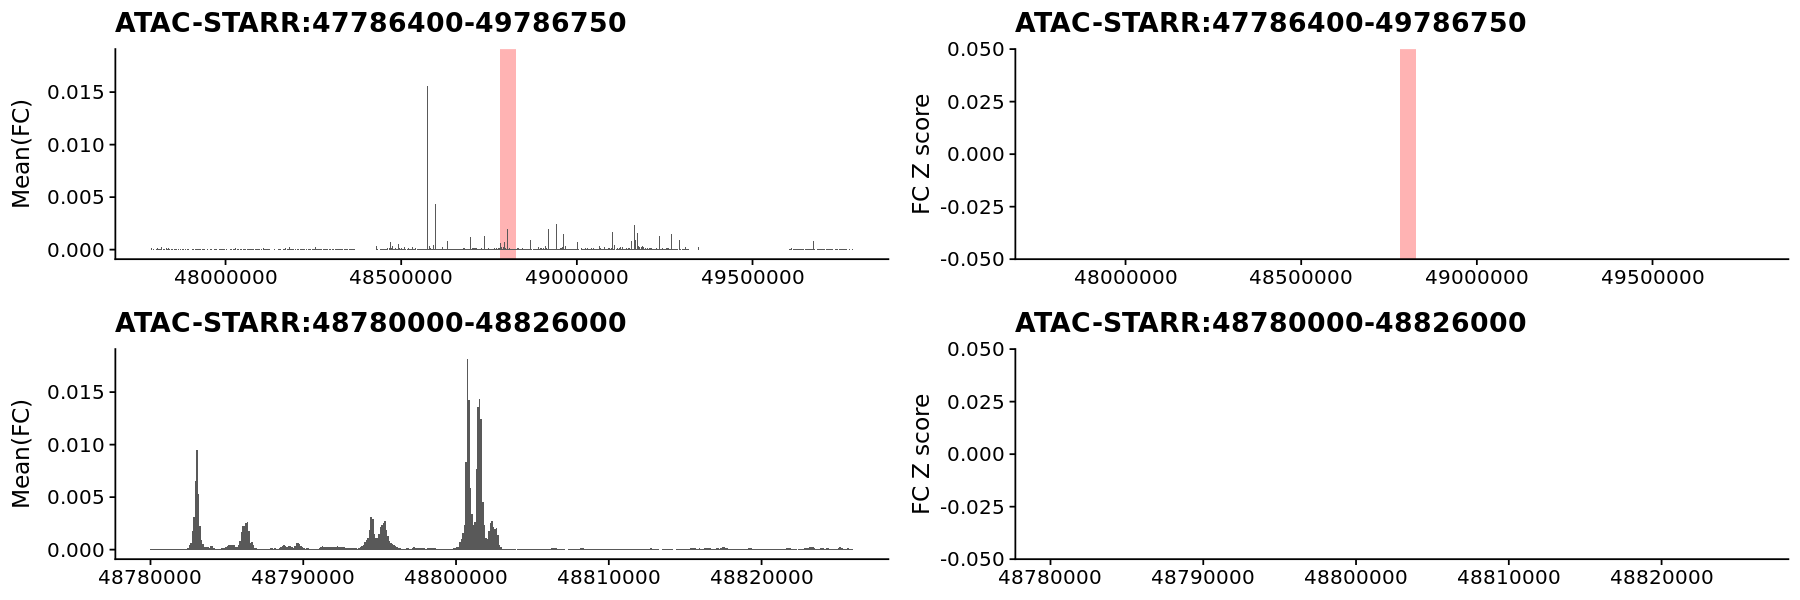

In [17]:
options(repr.plot.height=5, repr.plot.width=15)
plot_grid(
    gp11,
    gp12,
    gp13,
    gp14,
    align="v",  
    ncol=2)

Warning message:
“Removed 1 rows containing missing values (geom_rect).”
Warning message:
“Removed 1 rows containing missing values (geom_rect).”
Warning message:
“Removed 19544 rows containing missing values (geom_rect).”
Warning message:
“Removed 19544 rows containing missing values (geom_rect).”


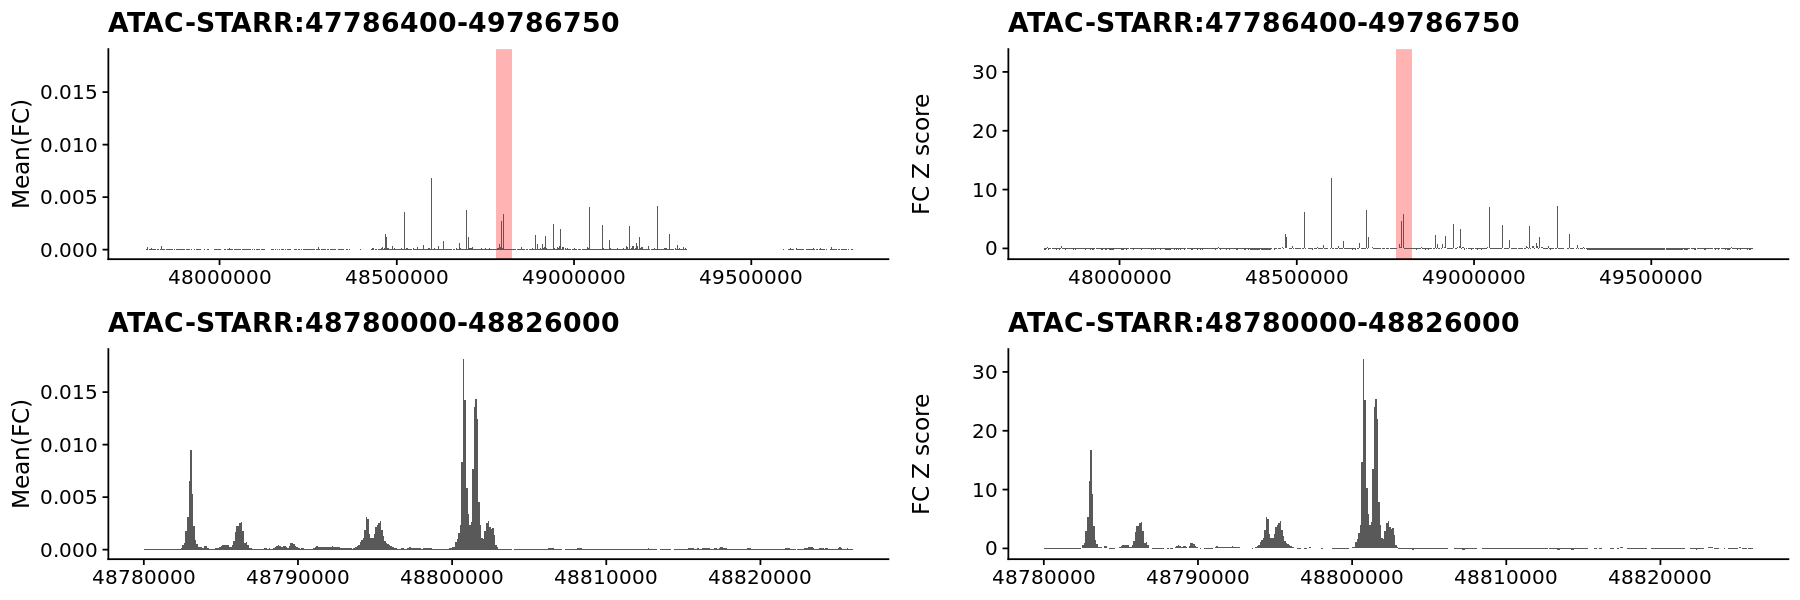

In [18]:
options(repr.plot.height=5, repr.plot.width=15)
plot_grid(
    gp11,
    gp12,
    gp13,
    gp14,
    align="v",  
    ncol=2)

In [54]:
### create figure
dat = df2

start  = 47786400
end    = 49786750
gp21 = ggplot() + 
    geom_rect(
        data = dat_region,
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=-Inf, 
            ymax=Inf),
        fill="red",
        alpha=0.3) +
    geom_rect(
        data = dat,
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC_mu)) +
    labs(y="Mean(FC)", title=paste0("Tiling MPRA:", start, "-", end)) +
    theme_cowplot()

gp22 = ggplot() + 
    geom_rect(
        data = dat_region,
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=-Inf, 
            ymax=Inf),
        fill="red",
        alpha=0.3) +
    geom_rect(
        data = dat,
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC_zs)) +
    labs(y="FC Z score", title=paste0("Tiling MPRA:", start, "-", end)) +
    theme_cowplot()


start  = 48780000
end    = 48826000
gp23 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC_mu)) +
    xlim(start, end) +
    labs(y="Mean(FC)", title=paste0("Tiling MPRA:", start, "-", end)) +
    theme_cowplot()

gp24 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC_zs)) +
    xlim(start, end) +
    labs(y="FC Z score", title=paste0("Tiling MPRA:", start, "-", end)) +
    theme_cowplot()

Warning message:
“Removed 17709 rows containing missing values (geom_rect).”
Warning message:
“Removed 17709 rows containing missing values (geom_rect).”


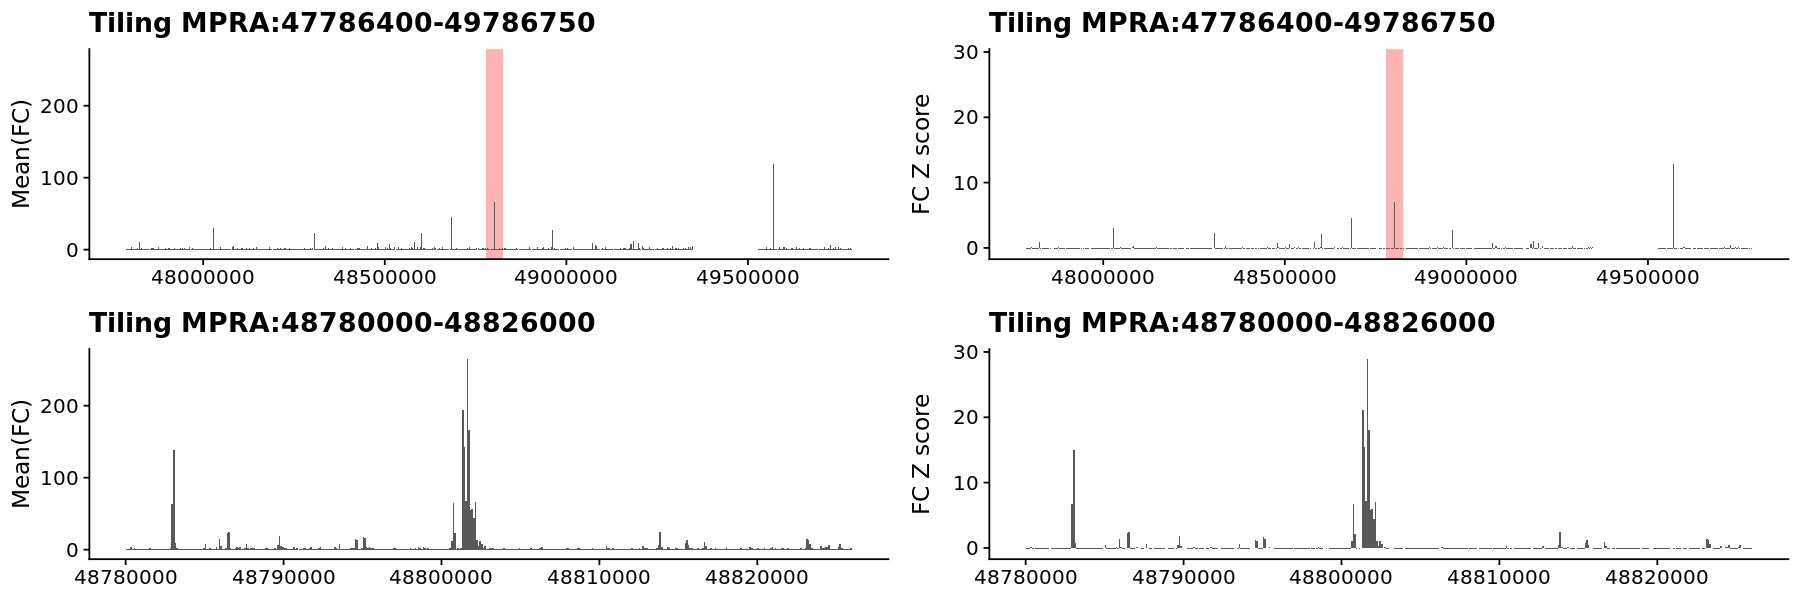

In [55]:
options(repr.plot.height=5, repr.plot.width=15)
plot_grid(
    gp21,
    gp22,
    gp23,
    gp24,
    align="v",  
    ncol=2)

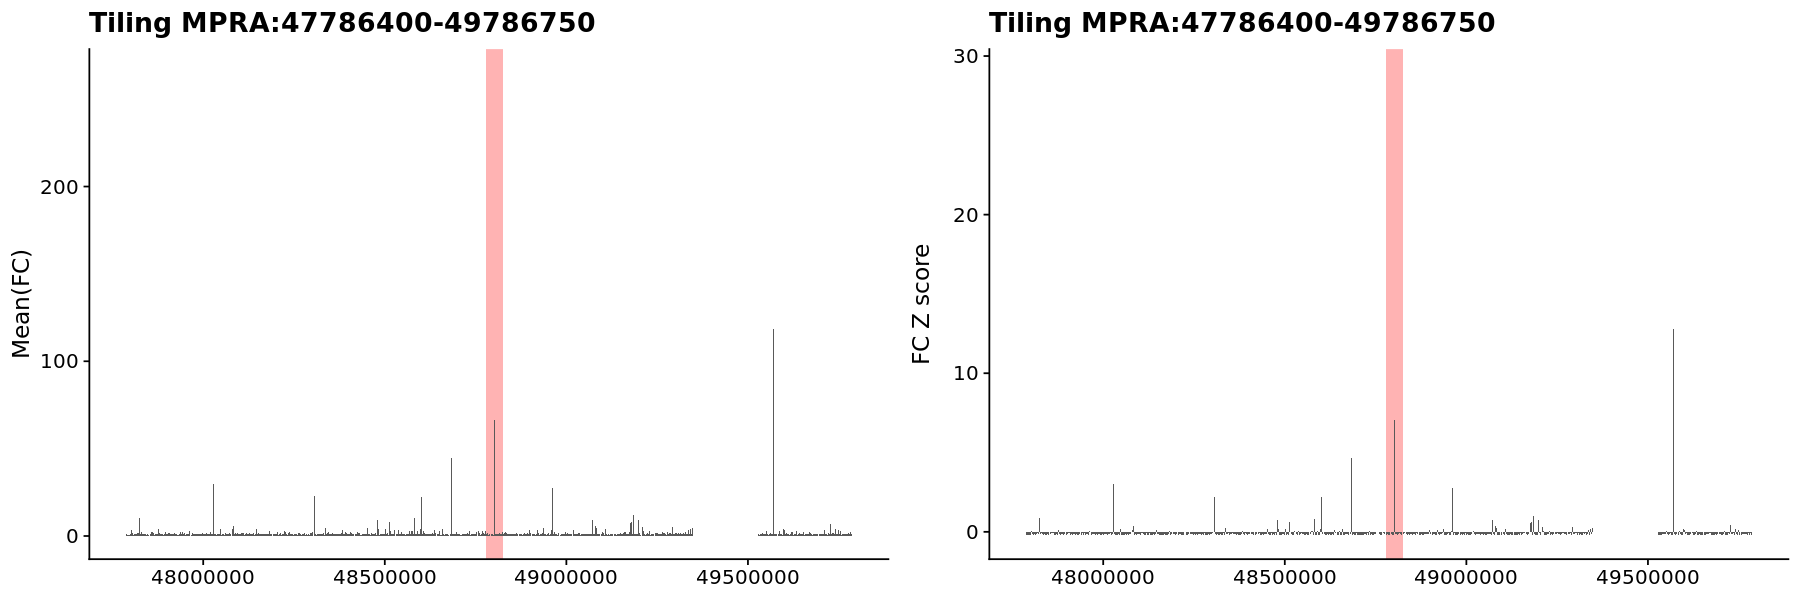

In [58]:
options(repr.plot.height=5, repr.plot.width=15)
plot_grid(
    gp21,
    gp22,
    align="v",  
    ncol=2)

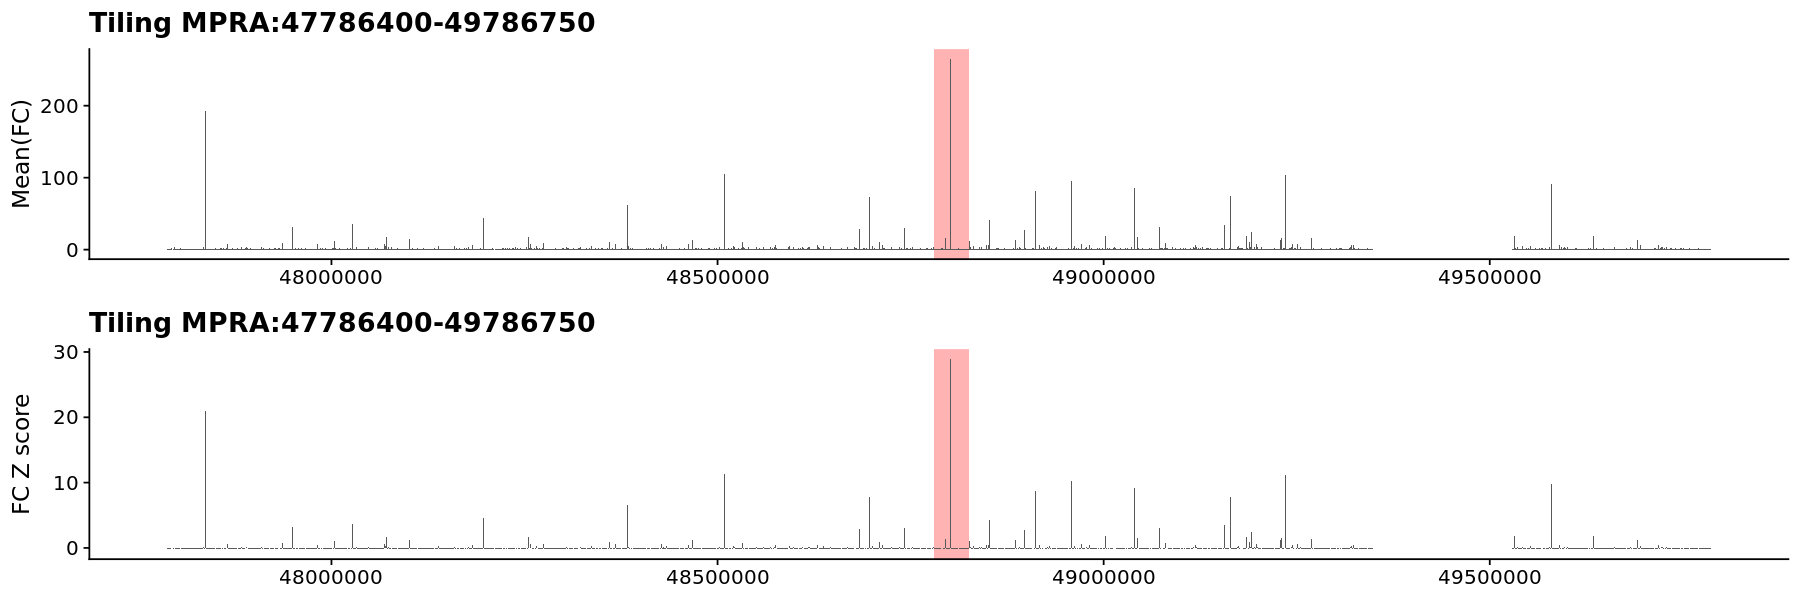

In [59]:
options(repr.plot.height=5, repr.plot.width=15)
plot_grid(
    gp21,
    gp22,
    align="v",  
    ncol=1)

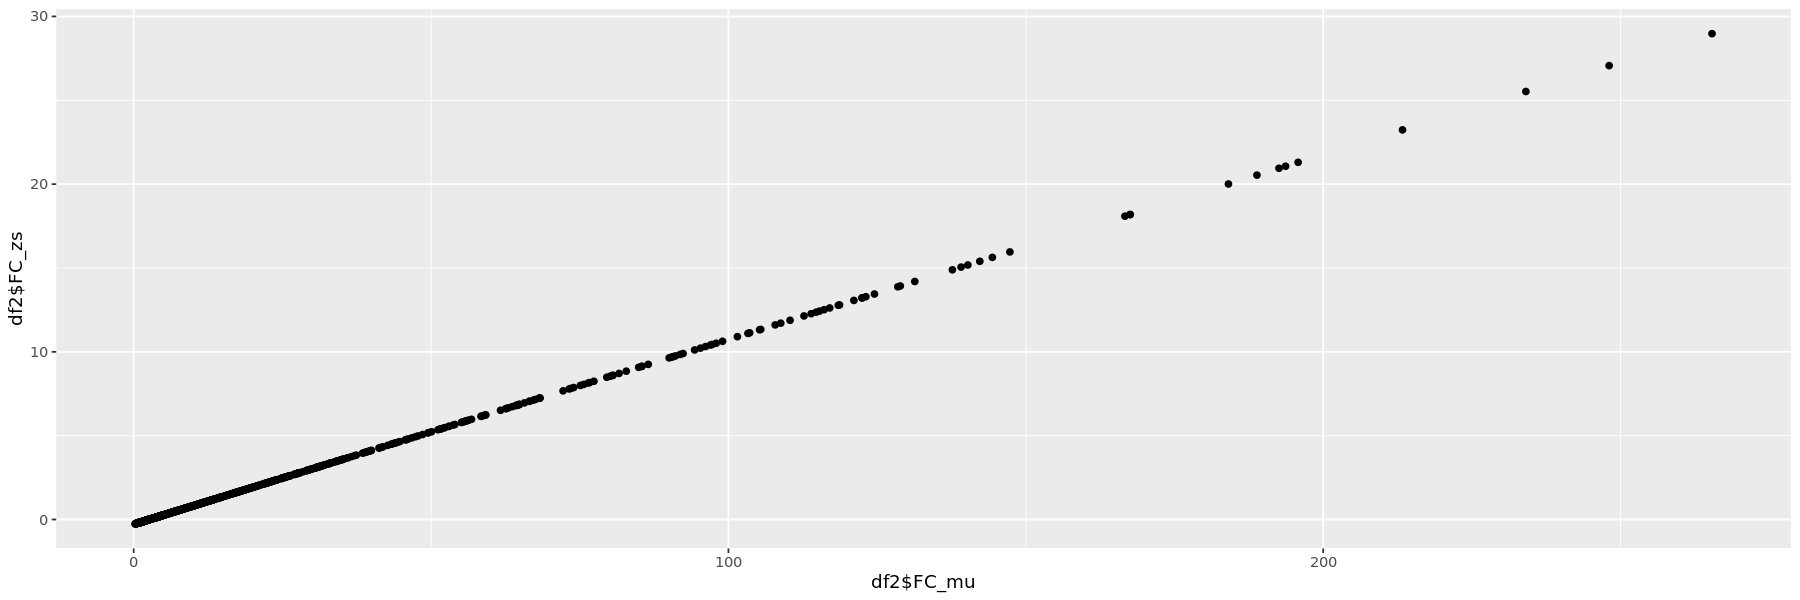

In [70]:
qplot(df2$FC_mu, df2$FC_zs)

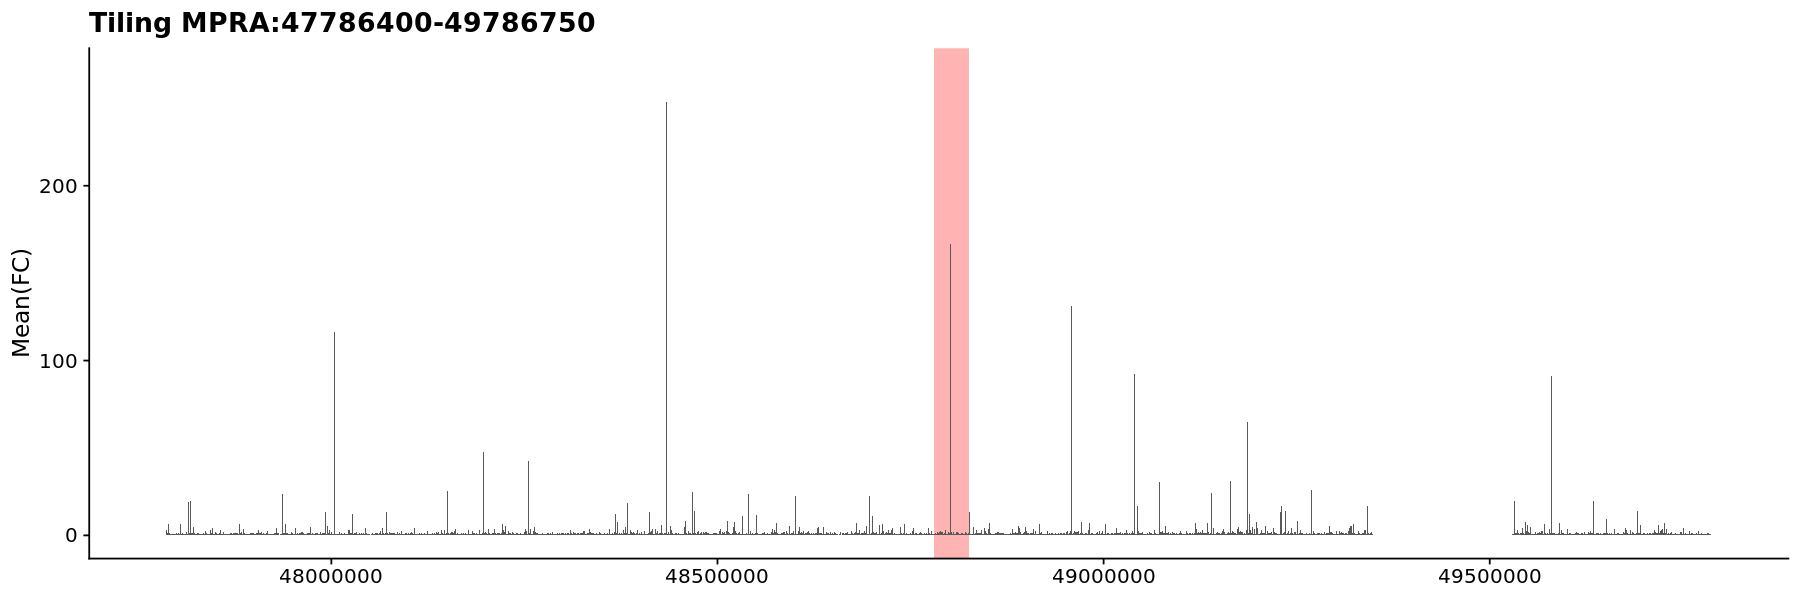

In [56]:
gp21

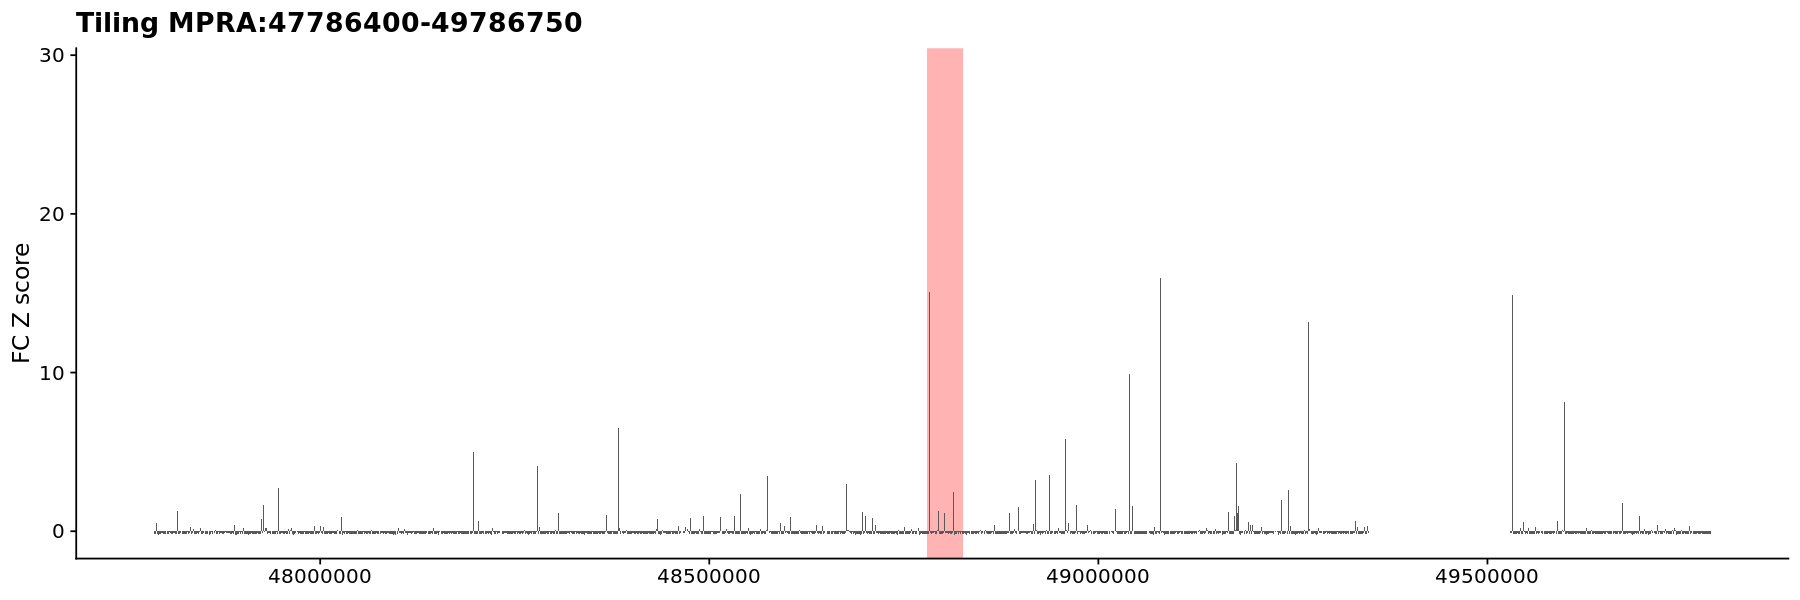

In [60]:
gp22

Warning message:
“Removed 1 rows containing missing values (geom_rect).”
Warning message:
“Removed 15594 rows containing missing values (geom_rect).”


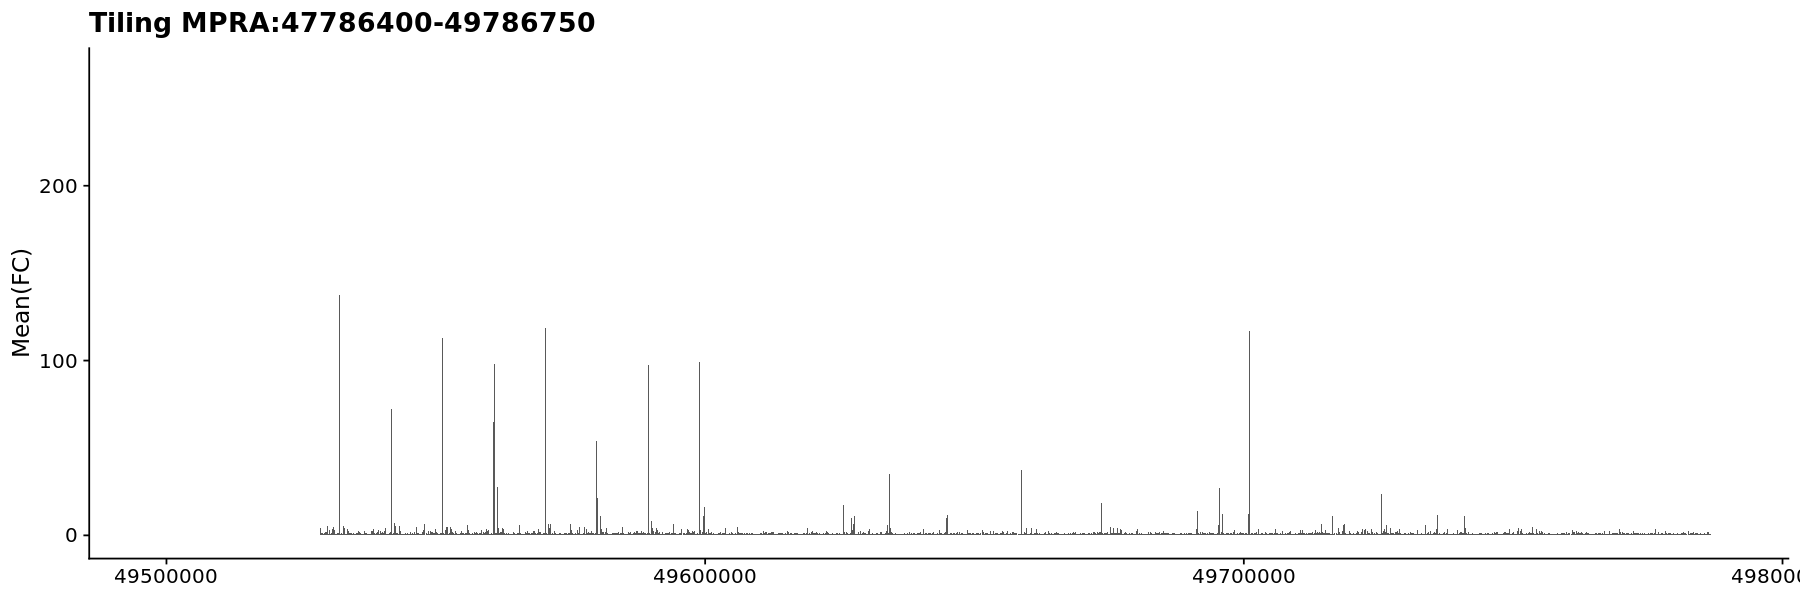

In [61]:
gp21 + xlim(49500000,49786750)

Warning message:
“Removed 1 rows containing missing values (geom_rect).”
Warning message:
“Removed 15594 rows containing missing values (geom_rect).”


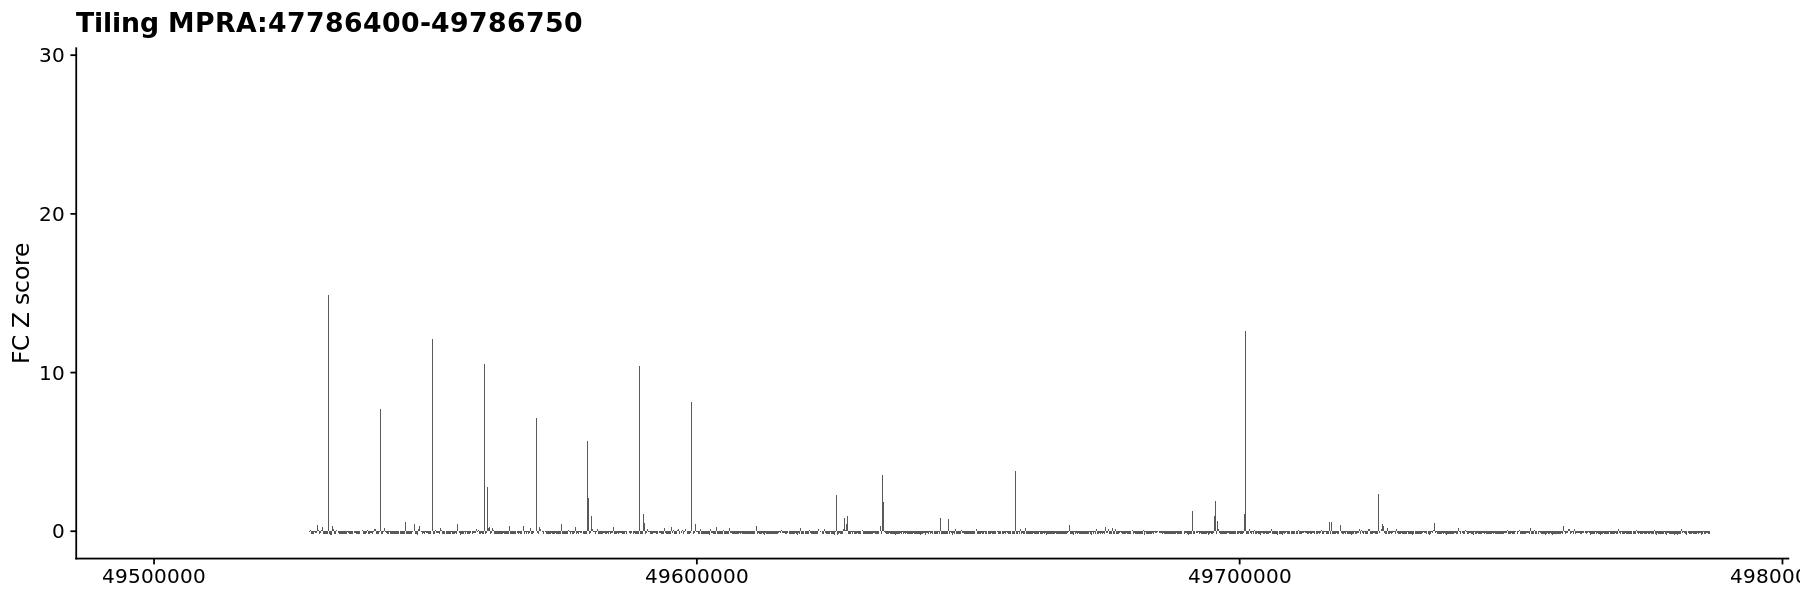

In [62]:
gp22 + xlim(49500000,49786750)

Warning message:
“Removed 1 rows containing missing values (geom_rect).”
Warning message:
“Removed 13111 rows containing missing values (geom_rect).”


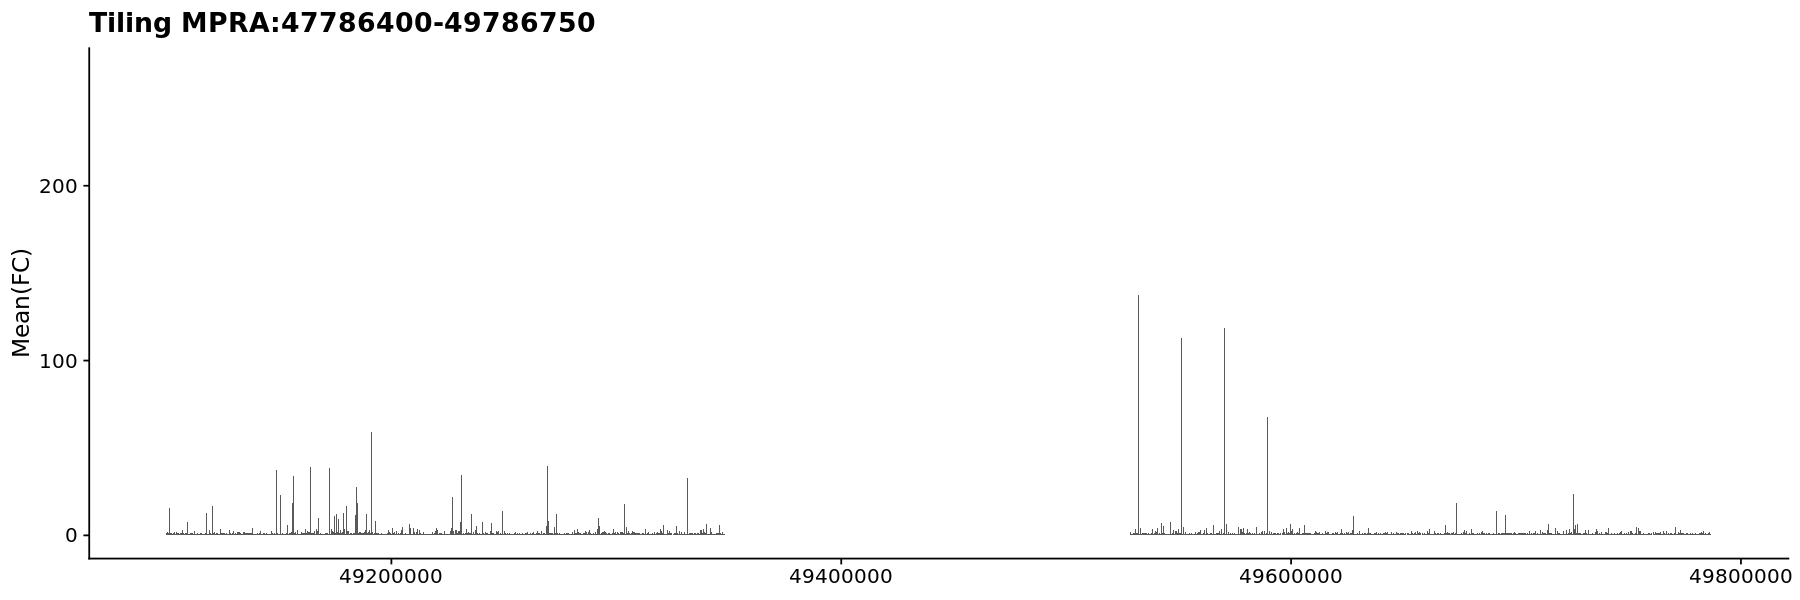

In [63]:
gp21 + xlim(49100000,49786750)

In [ ]:
gp22 + xlim(49500000,49786750)

In [ ]:
ggplot(df2, aes(x=FC_

## Correlation

In [21]:
tmp1 = df1 %>% rename("Input_ASTARR" = "Input", "Output_ASTARR" = "Output", "FC_mu_ASTARR" = "FC_mu", "FC_zs_ASTARR" = "FC_zs")
tmp2 = df2 %>% rename("Input_TMPRA"  = "Input", "Output_TMPRA"  = "Output", "FC_mu_TMPRA"  = "FC_mu", "FC_zs_TMPRA"  = "FC_zs")
df3  = inner_join(tmp1, tmp2, by=c("Left", "Right"))
head(df3)

Left,Right,Input_ASTARR,Output_ASTARR,FC_mu_ASTARR,FC_zs_ASTARR,Input_TMPRA,Output_TMPRA,FC_mu_TMPRA,FC_zs_TMPRA
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
47786500,47786600,3.321945e-07,0,0,-0.2102779,1751.8971,6430.9938,3.3328326,0.07969016
47786600,47786700,3.610810e-07,0,0,-0.2102779,2172.3111,2689.7500,1.2090520,-0.15449603
47786700,47786800,5.127350e-07,0,0,-0.2102779,1837.0876,1869.9298,1.0134790,-0.17606158
47786800,47786900,7.221619e-07,0,0,-0.2102779,778.4989,712.1432,0.9237430,-0.18595663
47786900,47787000,6.453957e-07,0,0,-0.2102779,1010.6762,933.2600,0.9550967,-0.18249931
47787000,47787100,7.196234e-07,0,0,-0.2102779,1428.0273,1396.3573,0.9782047,-0.17995122


In [22]:
n_windows  = 5 * 2 + 1
idx_middle = 5 + 1
n_rows     = nrow(df3)
mat_slices = embed(1:n_rows, n_windows)
mat_slices %>% head

11,10,9,8,7,6,5,4,3,2,1
12,11,10,9,8,7,6,5,4,3,2
13,12,11,10,9,8,7,6,5,4,3
14,13,12,11,10,9,8,7,6,5,4
15,14,13,12,11,10,9,8,7,6,5
16,15,14,13,12,11,10,9,8,7,6


In [24]:
THRESHOLD=10^-10
dat = df3
res = apply(mat_slices, 1, function(idxs){
    
    xval = dat$FC_zs_ASTARR[idxs]
    yval = dat$FC_zs_TMPRA[idxs]
    xstd = sd(xval)
    ystd = sd(yval)
    
    #is_xzero = all((-THRESHOLD < xval) & (xval < THRESHOLD))
    #is_yzero = all((-THRESHOLD < yval) & (yval < THRESHOLD))
    is_xzero = (xstd == 0)
    is_yzero = (ystd == 0)
    
    idx  = idxs[idx_middle]
    xloc = dat$Left[idx]
    yloc = dat$Right[idx]
    
    if (is_xzero | is_yzero){
        cval  = 0 
    } else {
        cval = cor(xval, yval, method = "spearman")
    }
    score = cval * abs(mean(xval)) * abs(mean(yval))
    return(c(xloc, yloc, cval, score))
})

dat_cor = data.frame(t(res))
colnames(dat_cor) = c("Left", "Right", "Spearman", "Score")
print(dim(dat_cor))
head(dat_cor)

[1] 18158     4


,Left,Right,Spearman,Score
,<dbl>,<dbl>,<dbl>,<dbl>
1,47787000,47787100,-0.1685317,-0.005213755
2,47787100,47787200,-0.3051080,-0.011004791
3,47787200,47787300,-0.4698945,-0.017170553
4,47787300,47787400,-0.4587349,-0.016504580
5,47787400,47787500,-0.5330310,-0.018623932
6,47787500,47787600,-0.6090909,-0.020916524


In [32]:
### create figure
dat = dat_cor

start  = 47786400
end    = 49786750
gp31 = ggplot(dat) + 
    geom_rect(
        data = dat_region,
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=-Inf, 
            ymax=Inf),
        fill = "red", 
        alpha = 0.3) +
    geom_rect(
        data = dat,
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Spearman)) +
    labs(y="Spearman", title=paste0("Correlation:", start, "-", end)) +
    theme_cowplot()

gp33 = ggplot() + 
    geom_rect(
        data = dat_region,
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=-Inf, 
            ymax=Inf),
        fill = "red", 
        alpha = 0.3) +
    geom_rect(
        data = dat,
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Score)) +
    labs(y="Score", title=paste0("Score:", start, "-", end)) +
    theme_cowplot()

start  = 48780000
end    = 48826000
gp32 = ggplot() + 
    geom_rect(
        data = dat,
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Spearman)) +
    xlim(start, end) +
    labs(y="Spearman", title=paste0("Correlation:", start, "-", end)) +
    theme_cowplot()

gp34 = ggplot() + 
    geom_rect(
        data = dat,
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Score)) +
    xlim(start, end) +
    labs(y="Score", title=paste0("Score:", start, "-", end)) +
    theme_cowplot()

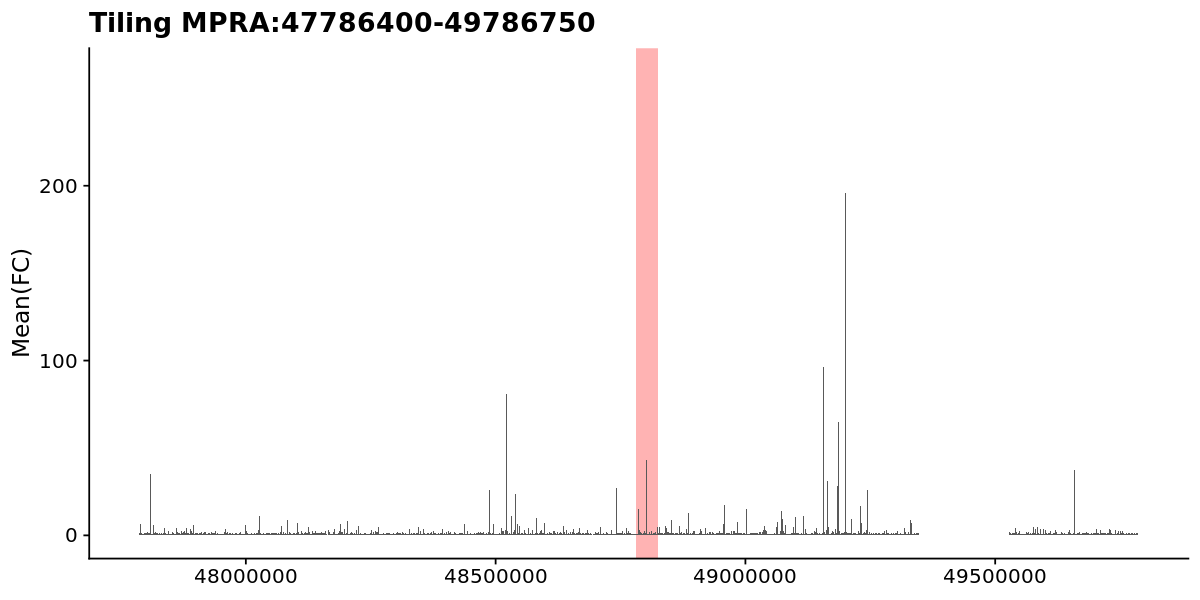

In [53]:
options(repr.plot.height=5, repr.plot.width=10)
gp21

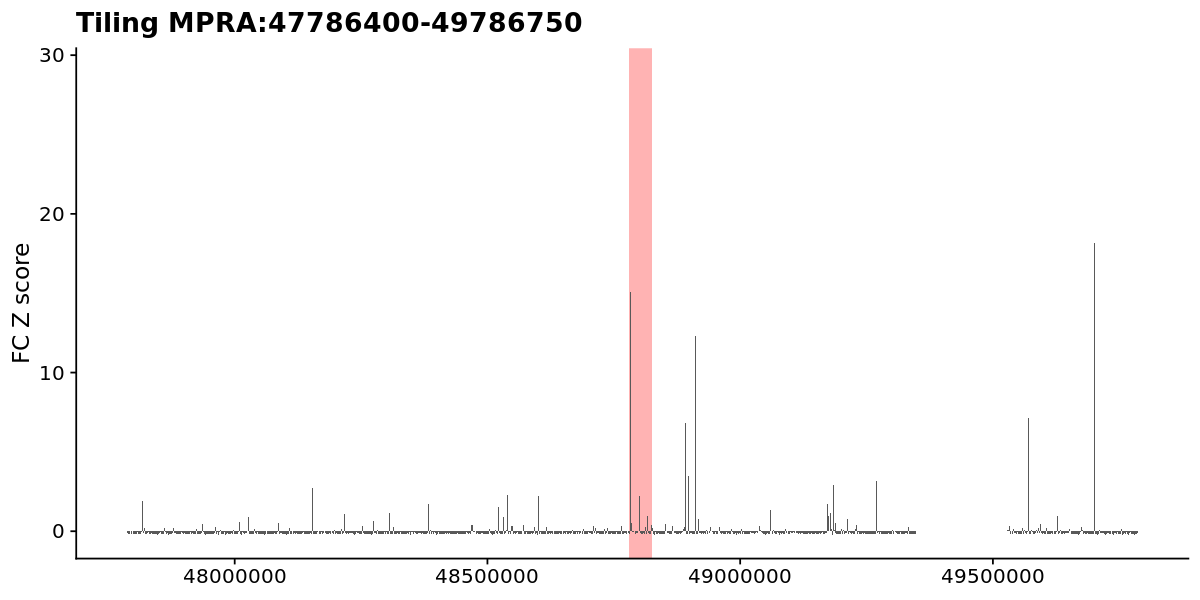

In [52]:
options(repr.plot.height=5, repr.plot.width=10)
gp22

Warning message:
“Removed 1 rows containing missing values (geom_rect).”
Warning message:
“Removed 1 rows containing missing values (geom_rect).”


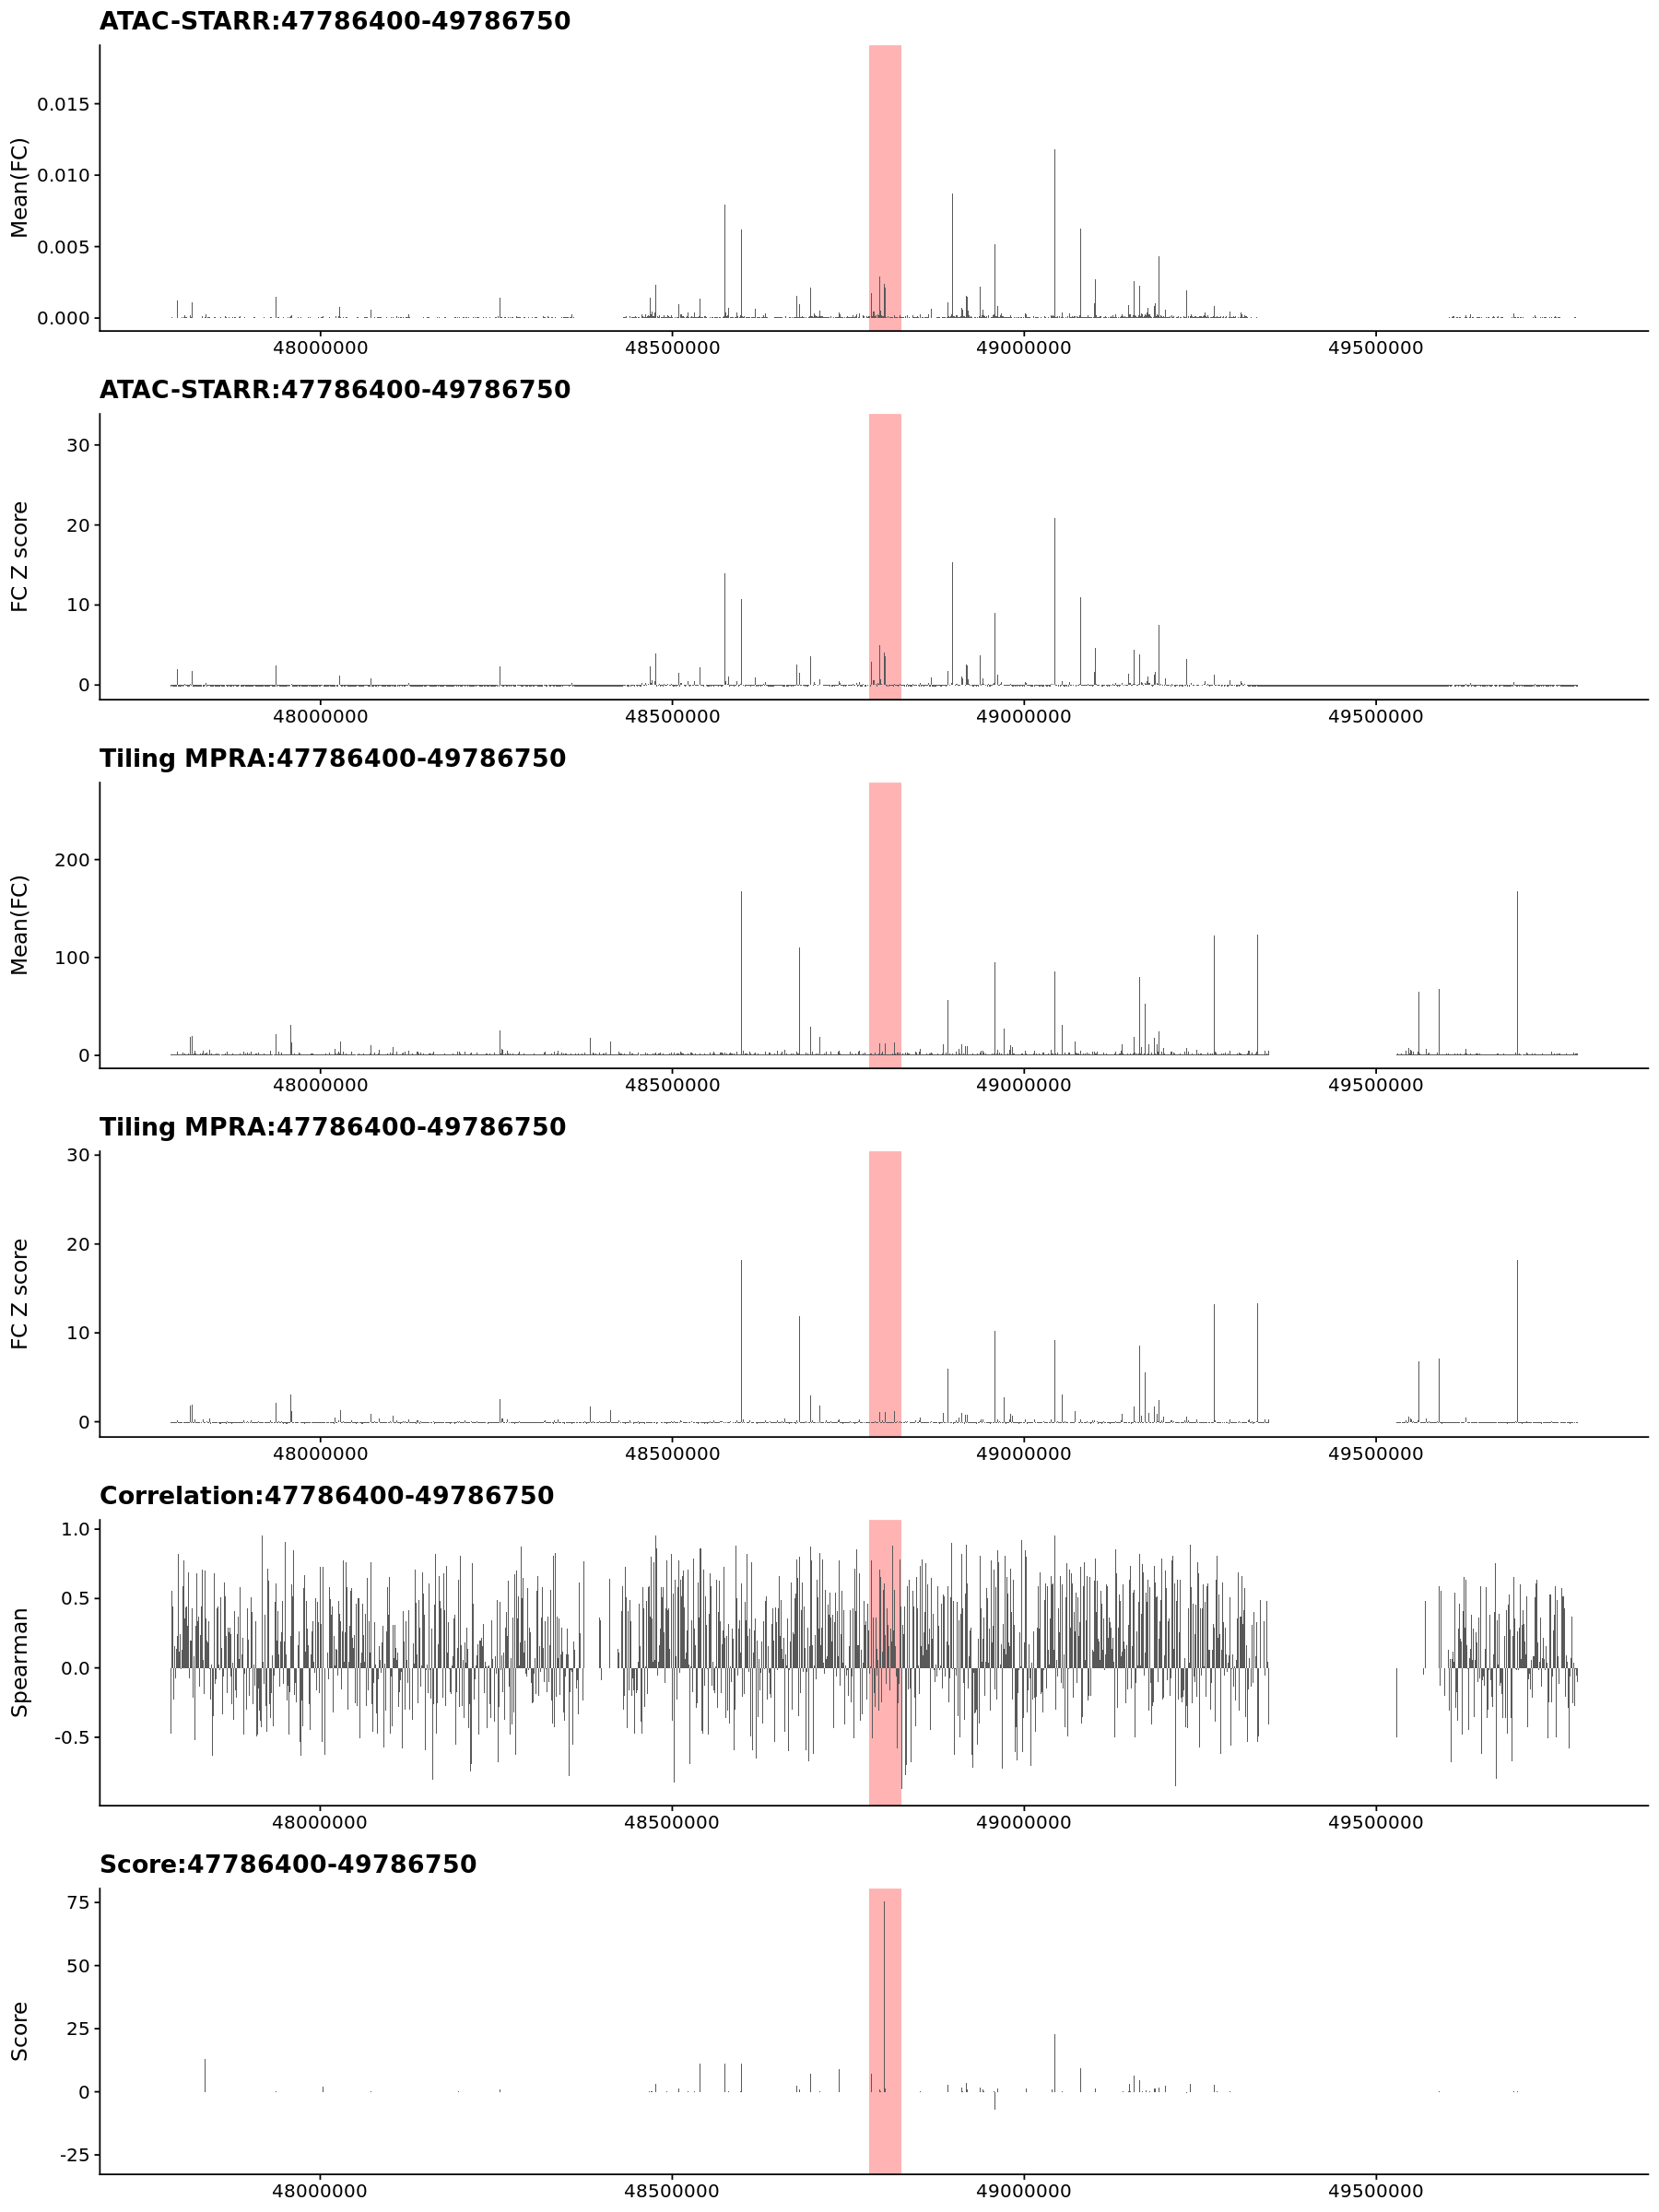

In [40]:
options(repr.plot.height=20, repr.plot.width=15)
plot_grid(
    gp11,
    #gp13,
    gp12,
    #gp14,
    gp21,
    #gp23,
    gp22,
    #gp24,
    gp31,
    #gp32,
    gp33,
    #gp34,
    align="v",  
    ncol=1)

Warning message:
“Removed 19544 rows containing missing values (geom_rect).”
Warning message:
“Removed 19544 rows containing missing values (geom_rect).”
Warning message:
“Removed 17709 rows containing missing values (geom_rect).”
Warning message:
“Removed 17709 rows containing missing values (geom_rect).”
Warning message:
“Removed 17699 rows containing missing values (geom_rect).”
Warning message:
“Removed 17699 rows containing missing values (geom_rect).”


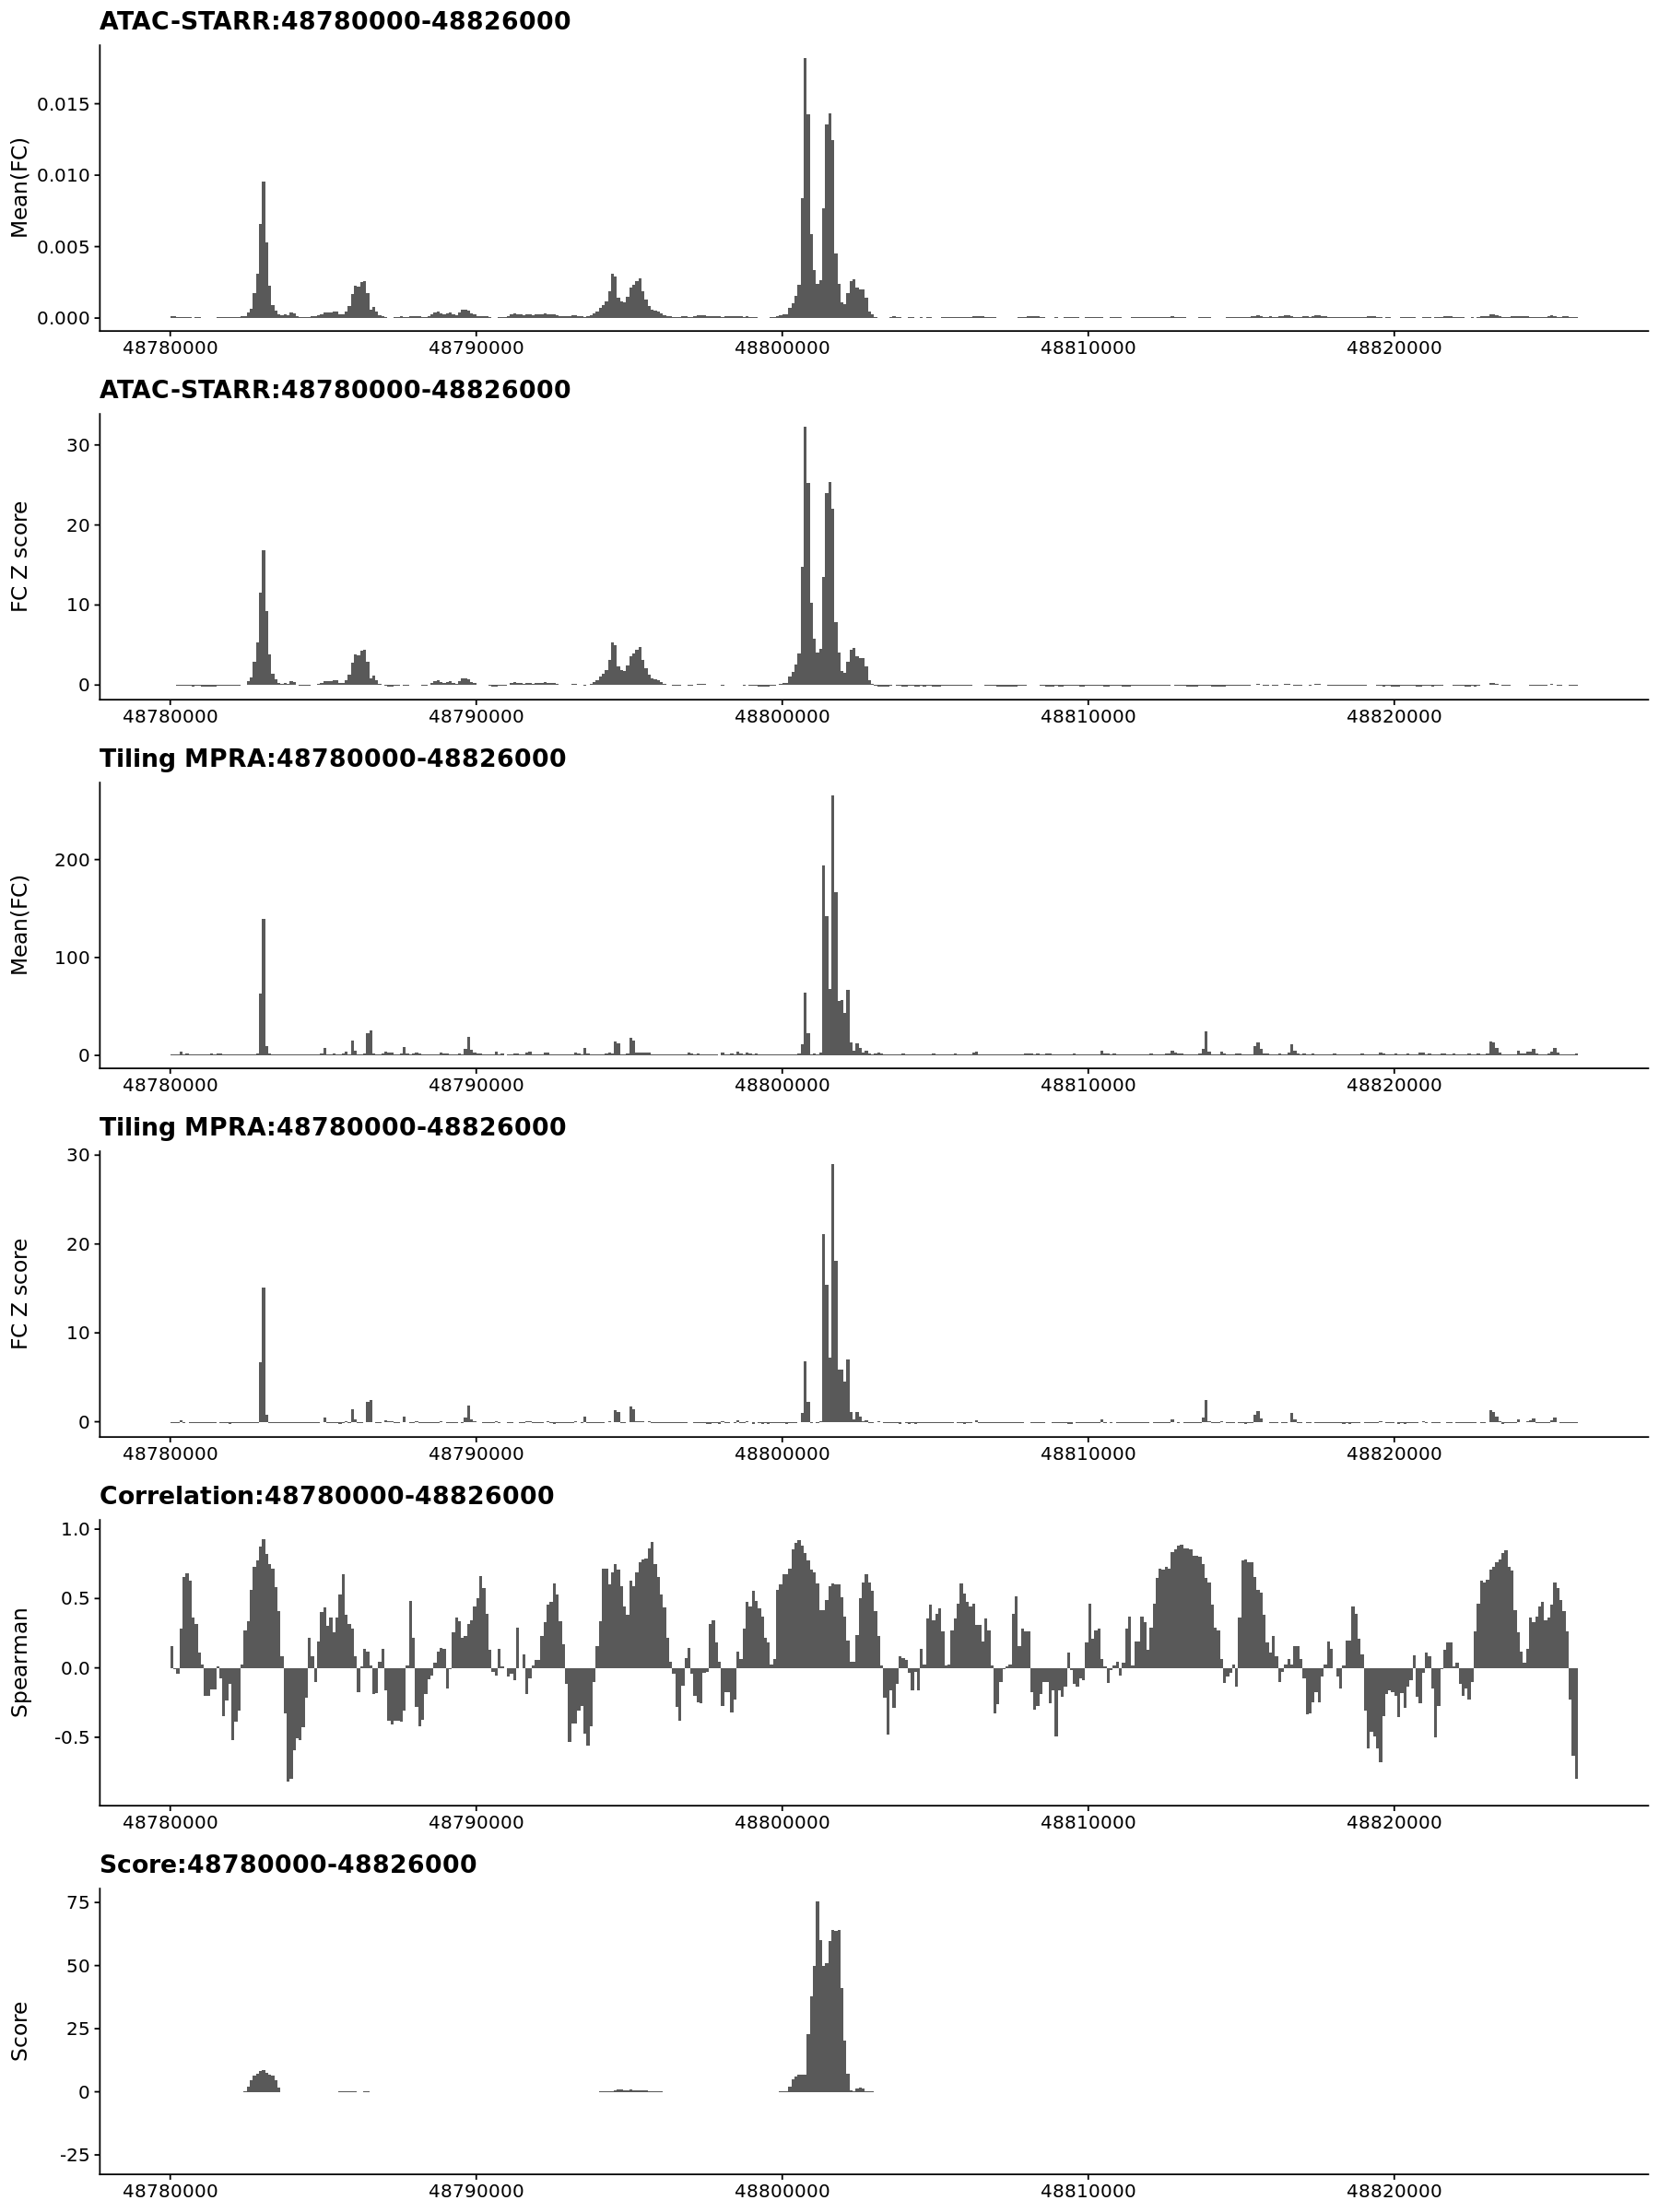

In [71]:
options(repr.plot.height=20, repr.plot.width=15)
plot_grid(
    #gp11,
    gp13,
    #gp12,
    gp14,
    #gp21,
    gp23,
    #gp22,
    gp24,
    #gp31,
    gp32,
    #gp33,
    gp34,
    align="v",  
    ncol=1)

Warning message:
“Removed 19544 rows containing missing values (geom_rect).”
Warning message:
“Removed 17709 rows containing missing values (geom_rect).”
Warning message:
“Removed 17699 rows containing missing values (geom_rect).”
Warning message:
“Removed 17699 rows containing missing values (geom_rect).”


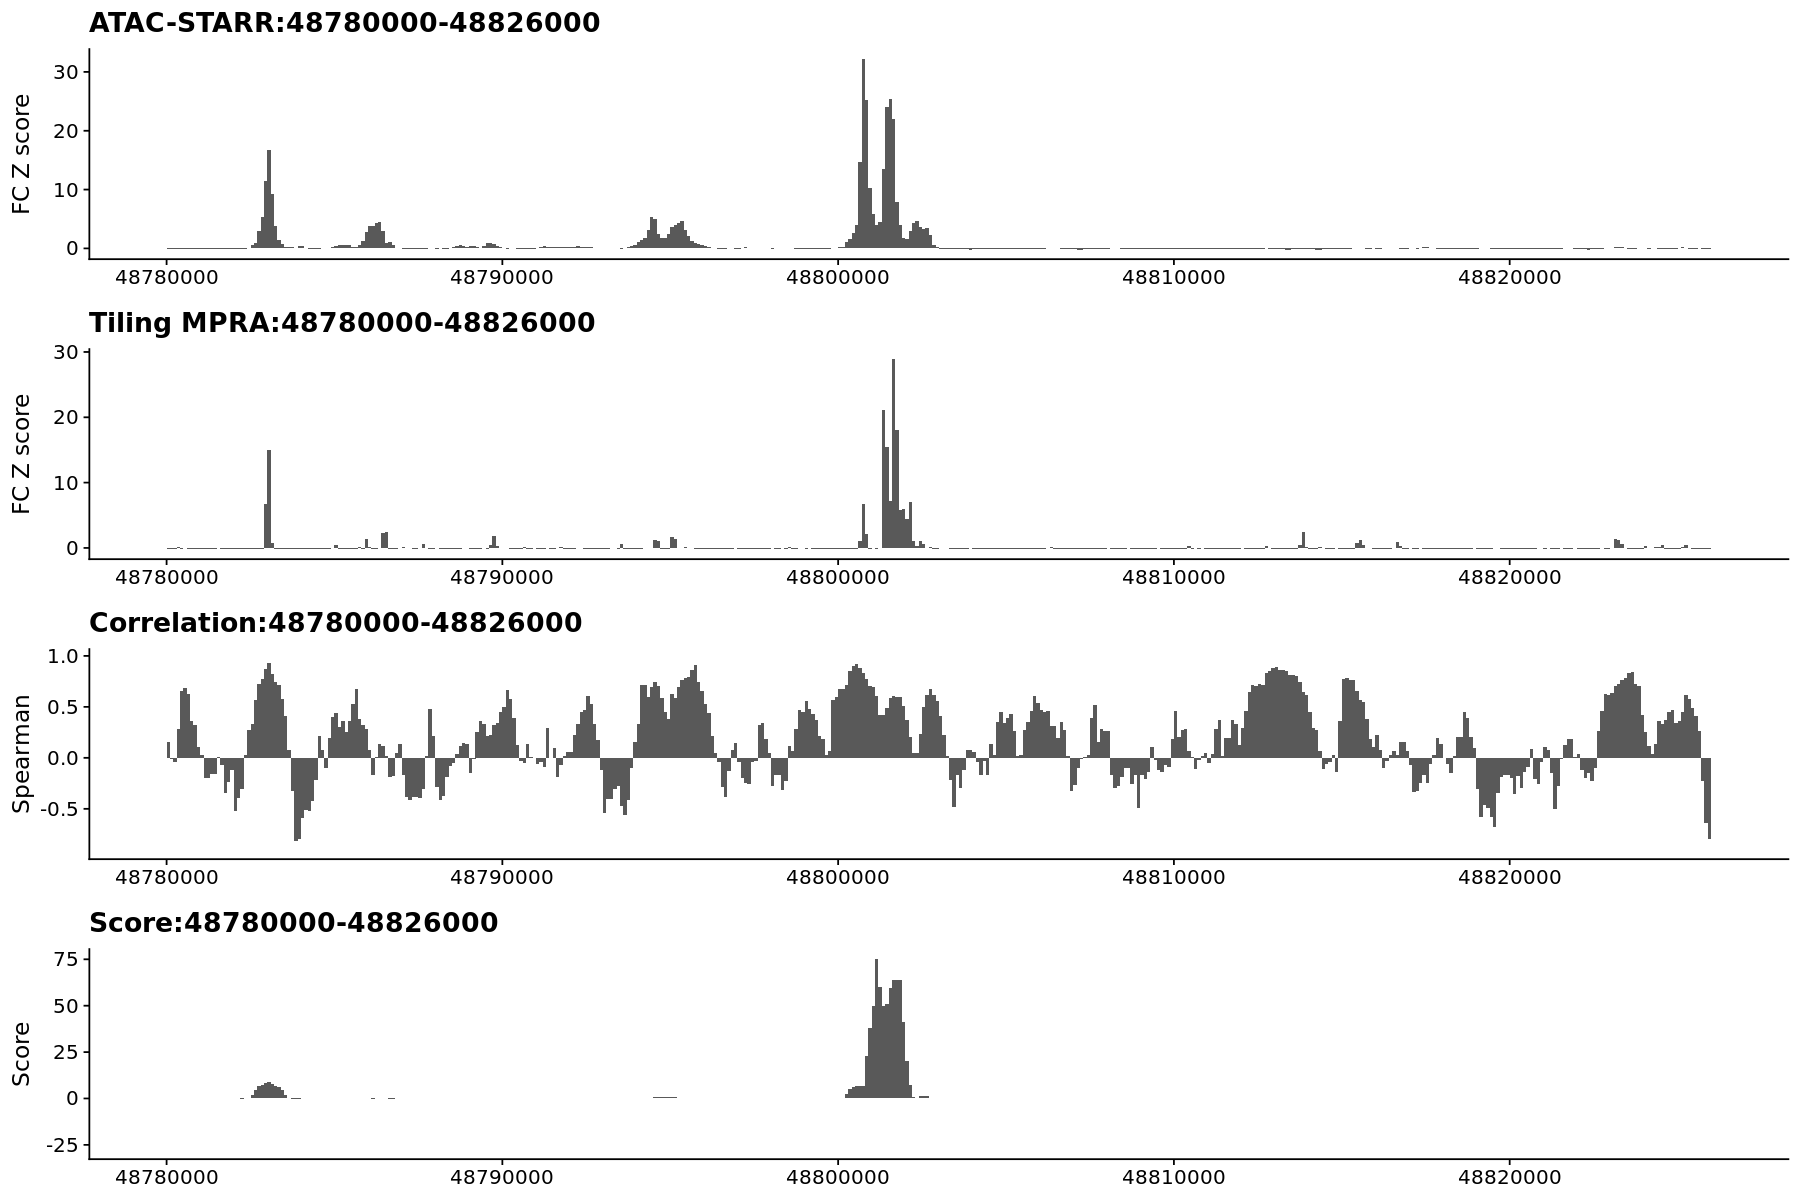

In [73]:
options(repr.plot.height=10, repr.plot.width=15)
plot_grid(
    #gp11,
    #gp13,
    #gp12,
    gp14,
    #gp21,
    #gp23,
    #gp22,
    gp24,
    #gp31,
    gp32,
    #gp33,
    gp34,
    align="v",  
    ncol=1)

Warning message:
“Removed 1 rows containing missing values (geom_rect).”
Warning message:
“Removed 19544 rows containing missing values (geom_rect).”
Warning message:
“Removed 1 rows containing missing values (geom_rect).”
Warning message:
“Removed 19544 rows containing missing values (geom_rect).”
Warning message:
“Removed 17709 rows containing missing values (geom_rect).”
Warning message:
“Removed 17709 rows containing missing values (geom_rect).”
Warning message:
“Removed 17699 rows containing missing values (geom_rect).”
Warning message:
“Removed 17699 rows containing missing values (geom_rect).”


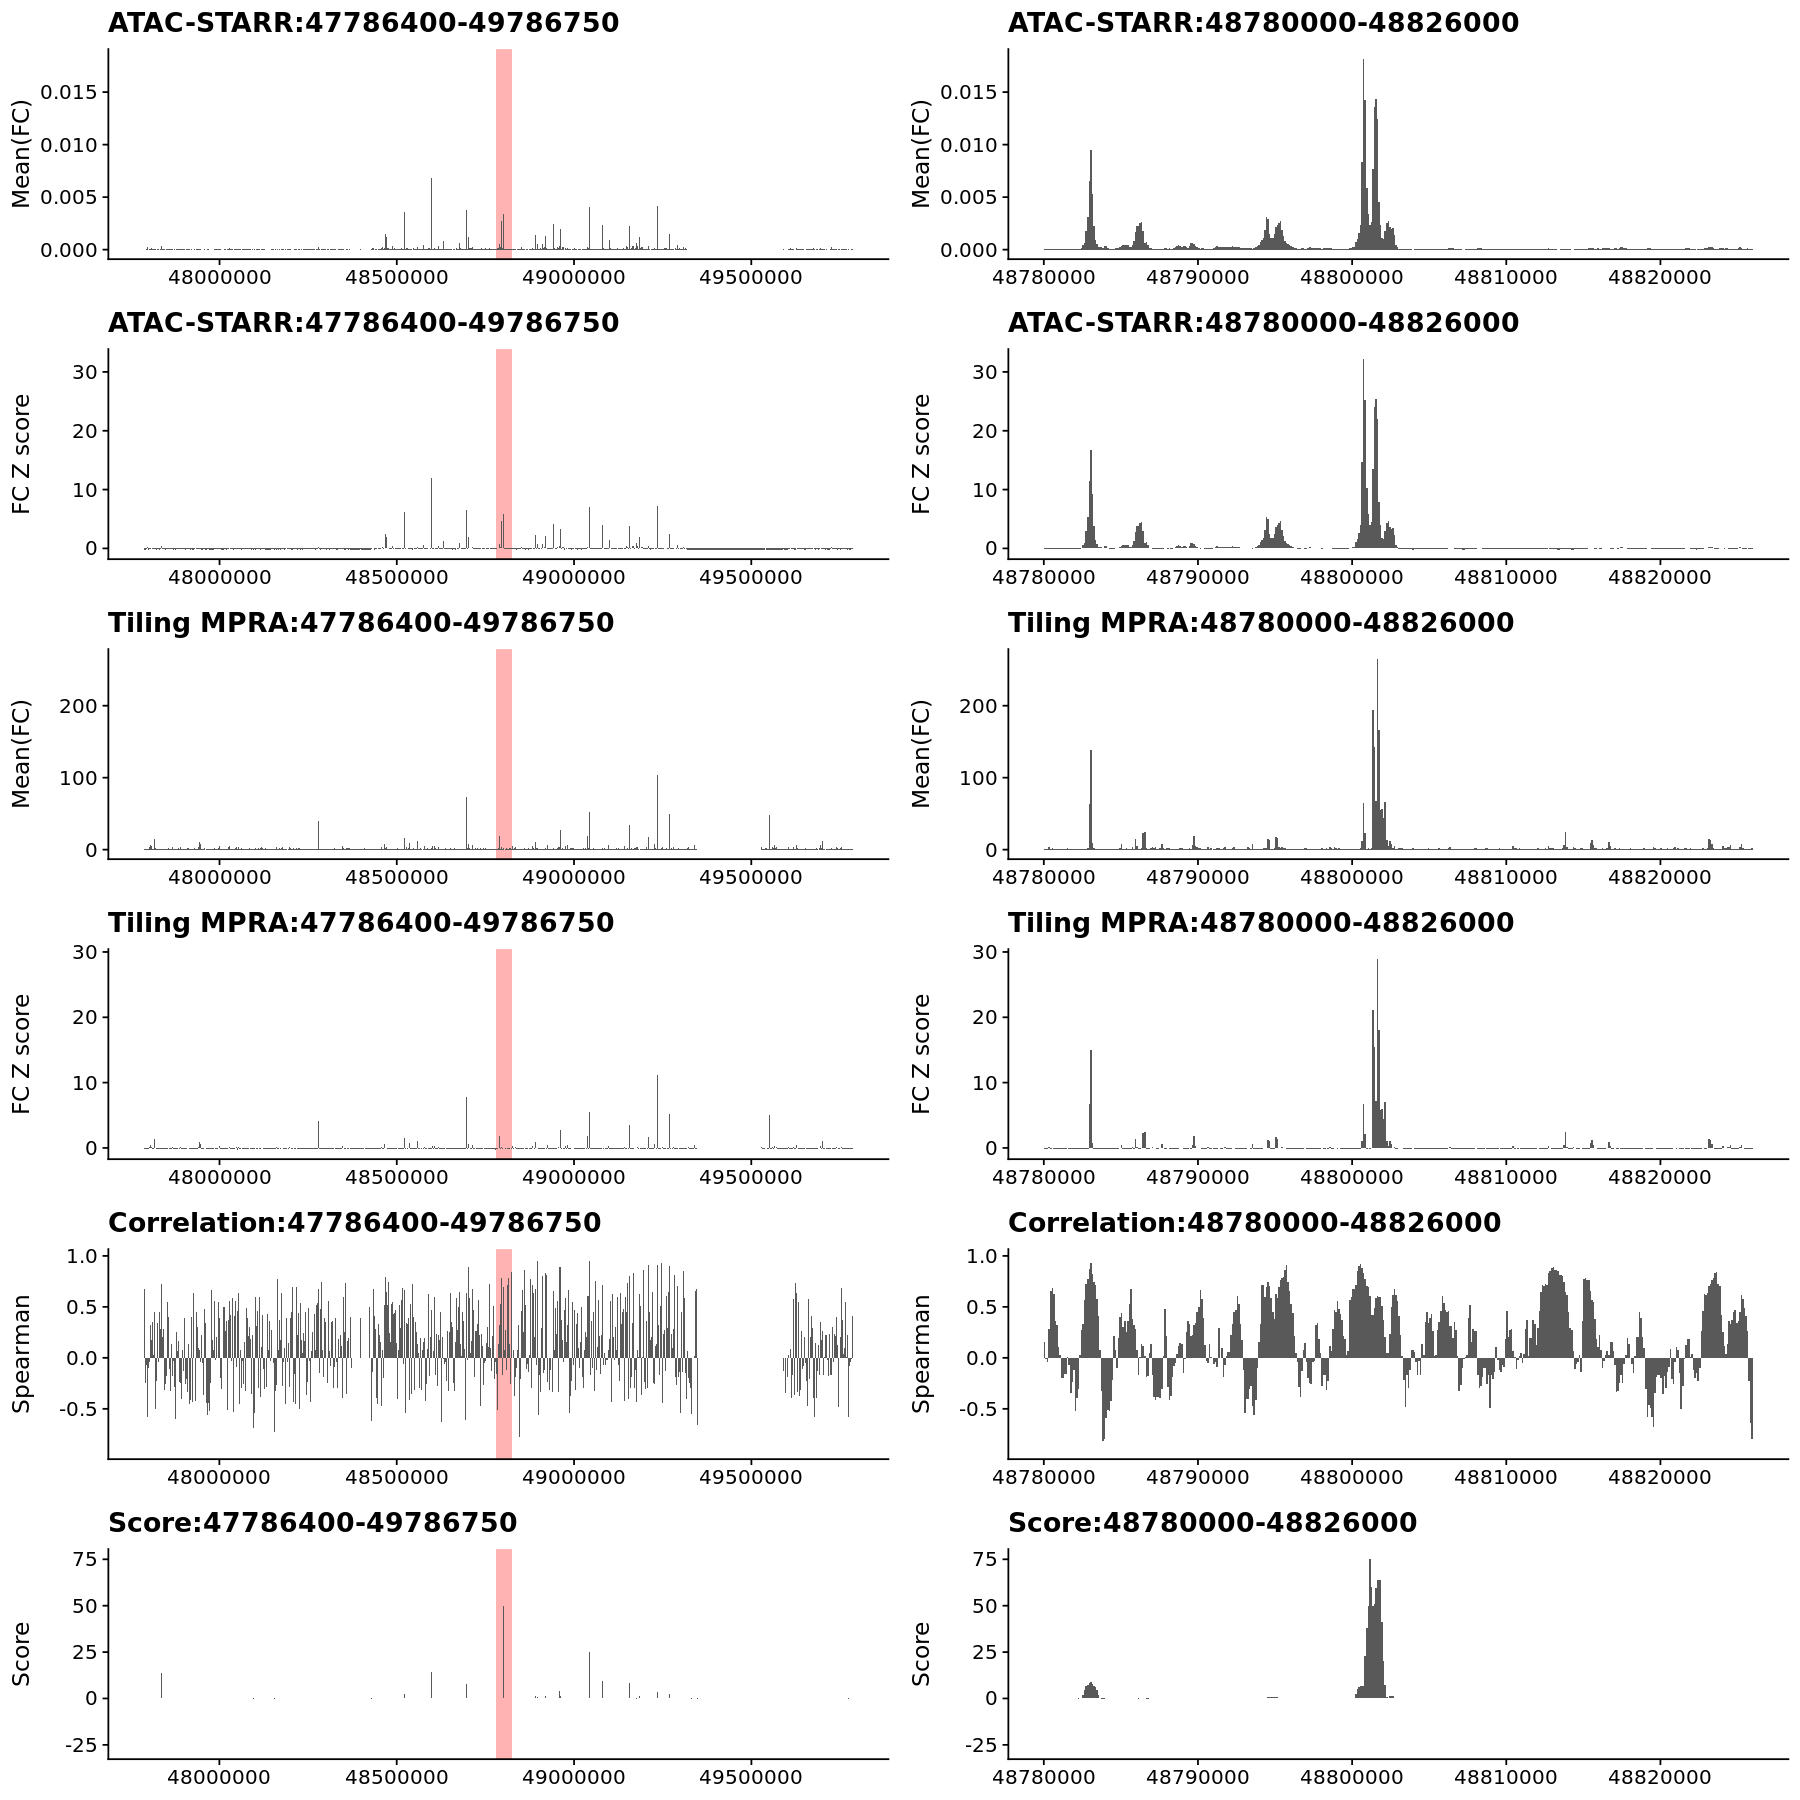

In [33]:
options(repr.plot.height=15, repr.plot.width=15)
plot_grid(
    gp11,
    gp13,
    gp12,
    gp14,
    gp21,
    gp23,
    gp22,
    gp24,
    gp31,
    gp32,
    gp33,
    gp34,
    align="v",  
    ncol=2)

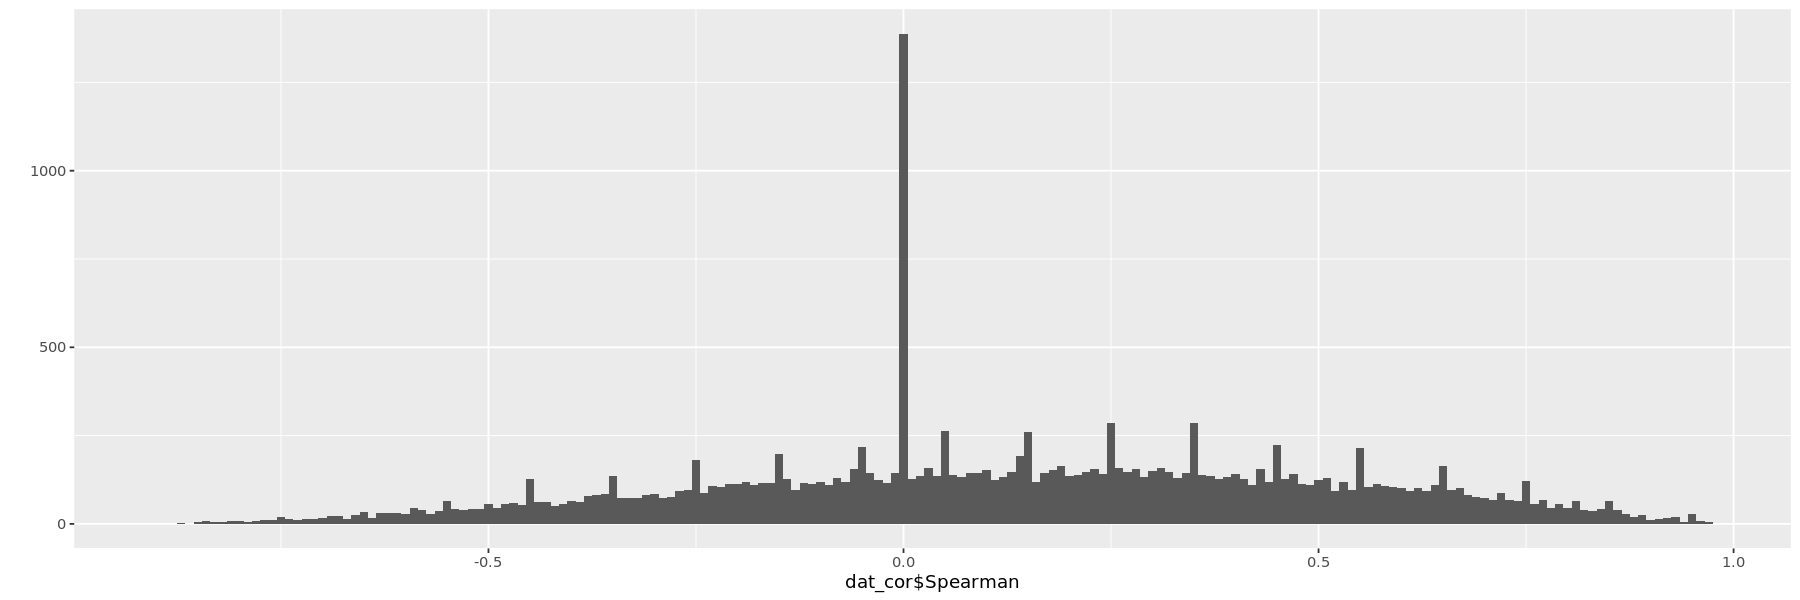

In [66]:
qplot(dat_cor$Spearman, binwidth=0.01)

[1] -27.57122  75.34530


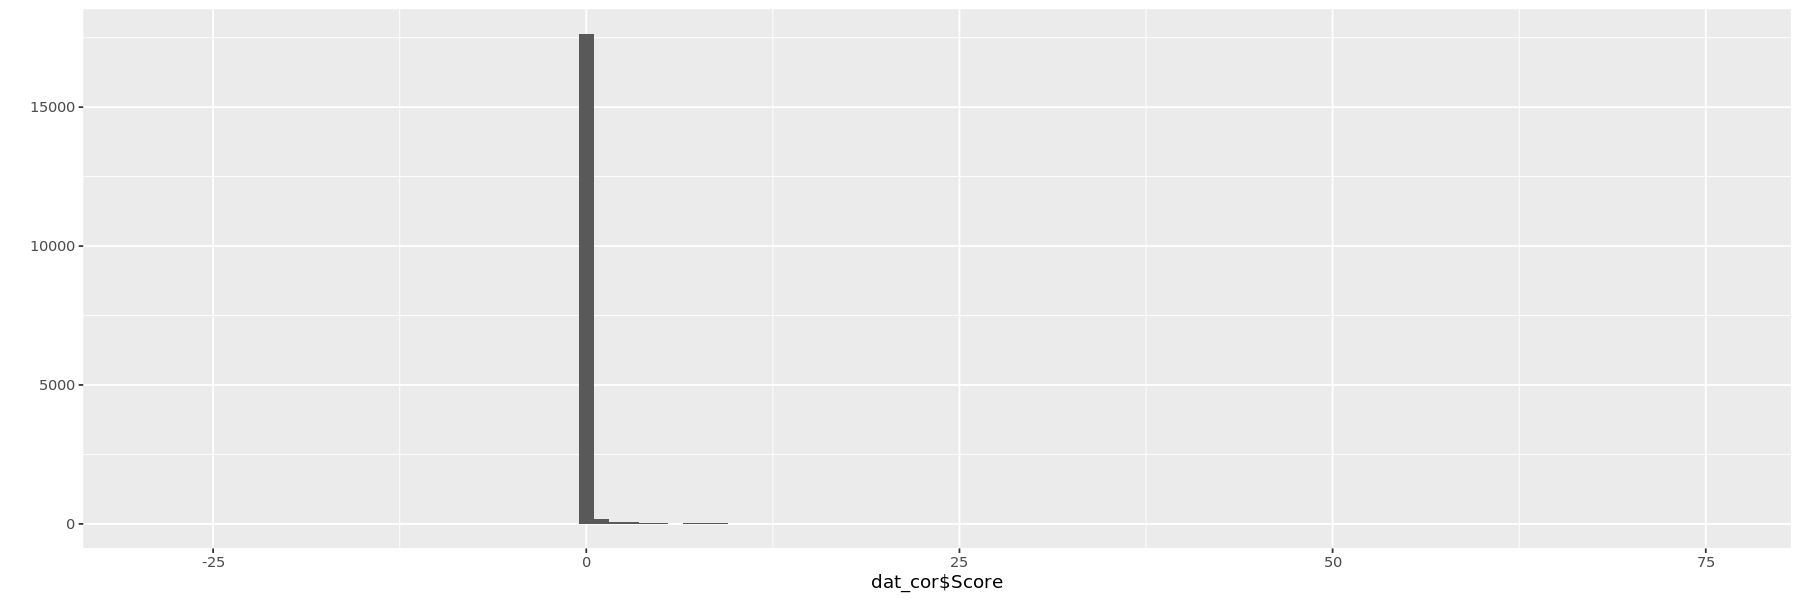

In [68]:
print(range(dat_cor$Score))
qplot(dat_cor$Score, binwidth=1)

In [59]:
#start  = 47786400
#end    = 49786750

#start = 48780000
#end   = 48826000

start  = 47786400
end    = 48000000

dat = res
dat = dat %>% dplyr::filter(Left > start, Right < end) %>% arrange(-Score)
head(dat, 20)

,Left,Right,Spearman,Score
,<dbl>,<dbl>,<dbl>,<dbl>
1,47836900,47837000,0.8090909,15.0730164
2,47837100,47837200,0.9727273,15.0730083
3,47837000,47837100,0.8727273,14.9850433
4,47836800,47836900,0.7272727,13.9352183
5,47836500,47836600,0.7272727,13.7862985
6,47836400,47836500,0.7000000,13.1014761
7,47837200,47837300,0.9727273,11.8661928
8,47836700,47836800,0.6090909,11.7355913
9,47836300,47836400,0.7181818,11.7162978


In [60]:
start = 47786400
end   = 47850000


dat   = df1
gp41 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC_zs)) +
    xlim(start, end) +
    labs(y="FC z score", title=paste0("ATAC-STARR:", start, "-", end)) +
    theme_cowplot()

dat = df2
gp42 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC_zs)) +
    xlim(start, end) +
    labs(y="FC z score", title=paste0("Tiling MPRA:", start, "-", end)) +
    theme_cowplot()

dat   = res
gp43 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Spearman)) +
    xlim(start, end) +
    labs(y="Spearman", title=paste0("Correlation:", start, "-", end)) +
    theme_cowplot()

gp44 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Score)) +
    xlim(start, end) +
    labs(y="Score", title=paste0("Score:", start, "-", end)) +
    theme_cowplot()

Warning message:
“Removed 19368 rows containing missing values (geom_rect).”
Warning message:
“Removed 17534 rows containing missing values (geom_rect).”
Warning message:
“Removed 17529 rows containing missing values (geom_rect).”
Warning message:
“Removed 17529 rows containing missing values (geom_rect).”


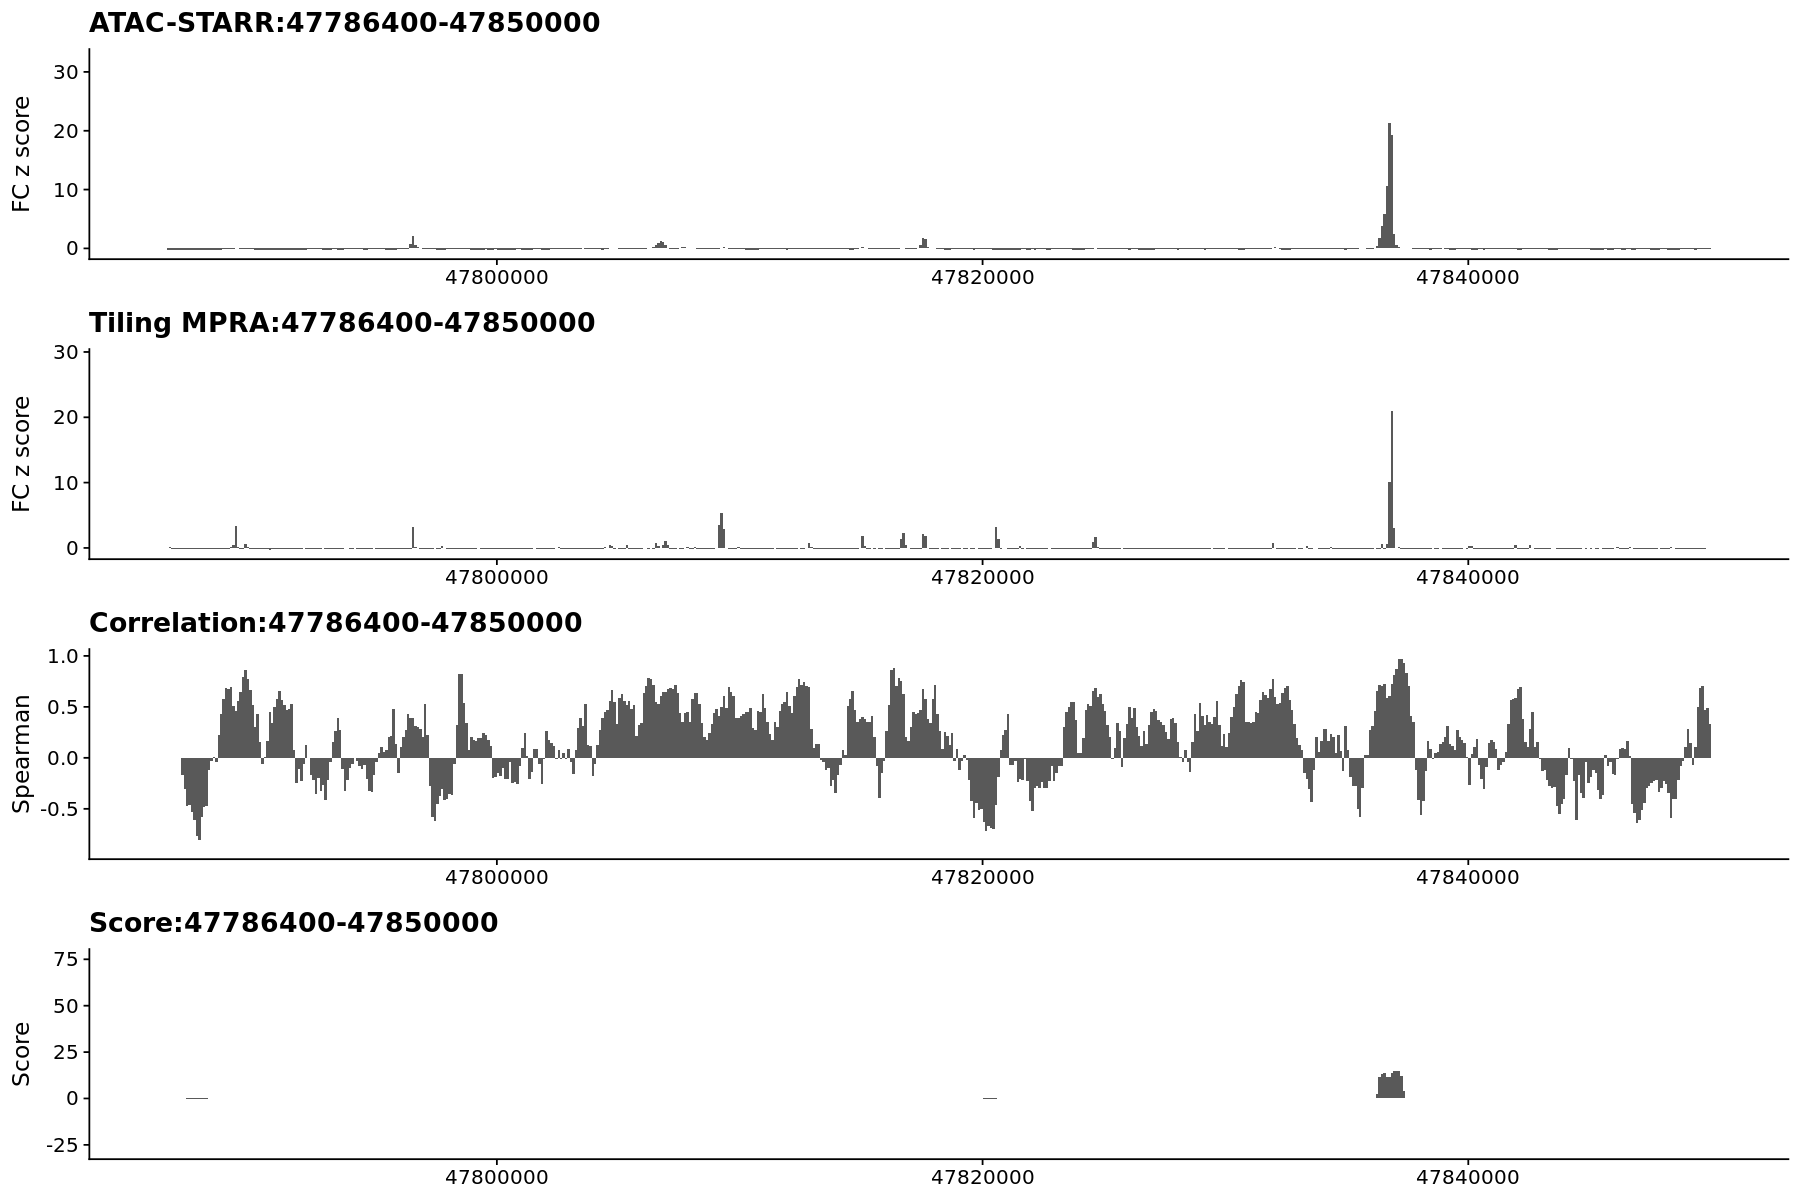

In [61]:
options(repr.plot.height=10, repr.plot.width=15)
plot_grid(
    gp41,
    gp42,
    gp43,
    gp44,
    align="v",  
    ncol=1)

In [69]:
library(GenomicRanges)

ERROR: Error in library(GenomicRanges): there is no package called ‘GenomicRanges’
